# Part 2 - Data Cleaning and EDA

### Content
- [Section 1 - Data Ingestion and Understanding](#section-1)  
- [Section 2 - Data Cleaning](#section-2) 
- [Section 3 - Exploratory Data Analysis (EDA)](#section-3) 
- [Section 3(A) - EDA - Rental](#section-3a) 
- [Section 3(B) - EDA - Amenities](#section-3b) 
- [Section 3(C) - EDA - Beds](#section-3c) 
- [Section 3(D) - EDA - Developer](#section-3d) 
- [Section 3(E) - EDA - District](#section-3e) 
- [Section 3(F) - EDA - Electoral Division](#section-3f) 
- [Section 3(G) - EDA - Lease](#section-3g) 
- [Section 3(H) - EDA - Nearest MRT](#section-3h) 
- [Section 3(I) - EDA - Neighbourhood](#section-3i) 
- [Section 3(J) - EDA - Property Type](#section-3j) 
- [Section 3(K) - EDA - Built-up area (sqft)](#section-3k) 
- [Section 3(L) - EDA - Tenure](#section-3l) 
- [Section 3(M) - EDA - Travel Time (Public Transport) to Changi Airport](#section-3m) 
- [Section 3(N) - EDA - Travel Time (Public Transport) to Orchard Road](#section-3n) 
- [Section 3(O) - EDA - Travel Time (Public Transport) to Raffles Place](#section-3o) 
- [Section 3(P) - EDA - Furnishing](#section-3p) 
- [Section 3(P) - EDA - Condo Name](#section-3q) 
- [Section 3(P) - EDA - Correlation Matrix](#section-3r) 
- [Section 3(P) - EDA - Regression Plots](#section-3s) 
___

#### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from collections import Counter
import re

from sklearn import preprocessing

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
with open("./Data/master_list_cleaned_v3.json", "r") as read_file:
    condo_dict_list_raw = json.load(read_file)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import warnings
warnings.filterwarnings("ignore")

<a name="section-1"></a>
___
## (i) Data Ingestion and Understanding

In [5]:
# Get full list of all features names
all_features_raw = []

for condo_dict in condo_dict_list_raw:
    all_features_raw.append(list(condo_dict.keys()))
    
all_features = set(x for l in all_features_raw for x in l)
all_features

{'amenities',
 'availability',
 'bath',
 'baths',
 'bed',
 'beds',
 'built_year',
 'developer',
 'district',
 'electoral_div',
 'ethnic',
 'facing',
 'floor',
 'furnishing',
 'keys_on_hand',
 'lease',
 'name',
 'nearest_mrt_dist',
 'nearest_mrt_name',
 'neighbourhood',
 'pets',
 'property_type',
 'psf',
 'rental',
 'sqft',
 'studio',
 'tenure',
 'title',
 'total_units',
 'travel_time_changi',
 'travel_time_orchard',
 'travel_time_raffles',
 'unit_types'}

In [6]:
condo_dict_list_raw[0]

{'amenities': ['Clubhouse',
  'Gym',
  'Spa Pool',
  'Swimming Pool',
  'Wading Pool',
  'Jacuzzi',
  'Steam Room',
  'Playground',
  'Parking',
  'Security',
  'Lap Pool',
  'BBQ'],
 'baths': '2',
 'beds': '3',
 'built_year': '2011',
 'developer': 'Grange Properties Pte Ltd (Chip Eng Seng Corporation Ltd)',
 'district': 'D09',
 'electoral_div': 'Tanjong Pagar GRC MP(s)',
 'lease': 'Flexible',
 'name': 'Grange Infinite',
 'nearest_mrt_dist': '5 min (419m)',
 'nearest_mrt_name': 'Somerset MRT',
 'neighbourhood': 'River Valley',
 'property_type': 'Condo',
 'psf': 'S$4.52',
 'rental': 'S$9,500/mo',
 'sqft': '2,100',
 'tenure': 'Freehold',
 'title': '3 Bed Condo for Rent in Grange Infinite',
 'total_units': '68',
 'travel_time_changi': '53 min',
 'travel_time_orchard': '12 min',
 'travel_time_raffles': '16 min',
 'unit_types': '3, 4, 8 BR'}

In [7]:
# Convert amenities list into a string
condo_dict_list = []

for condo_dict in condo_dict_list_raw:
    d = {k: str(v) for k,v in condo_dict.items()}
    condo_dict_list.append(d)

In [8]:
# Convert each dictionary in list into a dataframe
# Wrap dictionary in list first
list_df = [pd.DataFrame.from_dict([condo_dict]) for condo_dict in condo_dict_list]
list_df[0]

,amenities,baths,beds,built_year,developer,district,electoral_div,lease,name,nearest_mrt_dist,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,title,total_units,travel_time_changi,travel_time_orchard,travel_time_raffles,unit_types
0,"['Clubhouse', 'Gym', 'Spa Pool', 'Swimming Poo...",2,3,2011,Grange Properties Pte Ltd (Chip Eng Seng Corpo...,D09,Tanjong Pagar GRC MP(s),Flexible,Grange Infinite,5 min (419m),Somerset MRT,River Valley,Condo,S$4.52,"S$9,500/mo","2,100",Freehold,3 Bed Condo for Rent in Grange Infinite,68,53 min,12 min,16 min,"3, 4, 8 BR"


In [9]:
master_df_raw = pd.concat(list_df)
master_df_raw.sample(20)

,amenities,baths,beds,built_year,developer,district,electoral_div,lease,name,nearest_mrt_dist,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,title,total_units,travel_time_changi,travel_time_orchard,travel_time_raffles,unit_types,availability,ethnic,facing,furnishing,keys_on_hand,pets,bath,bed,floor,studio
0,"['Clubhouse', 'High Ceiling', 'Stove', 'Jacuzz...",NaN,NaN,2007,Lucky Pinnacle Pte Ltd (Far East),D02,Jalan Besar GRC MP(s),24 months,Icon,2 min (194m),Tanjong Pagar MRT,None,Condo,S$5.16,"S$3,000/mo",581,99 Years,1 Bed Condo for Rent in Icon,646,57 min,21 min,9 min,"Studio, 1, 2, 3 BR",Now,NaN,South,Fully Furnished,Yes,NaN,1,1,29,NaN
0,"['Security', 'Closet', 'Aircon', 'Swimming Poo...",4,4,1984,NaN,D21,Jurong GRC MP(s),Flexible,Chun Tin Court,2 min (161m),Beauty World MRT,Bukit Timah,Condo,S$3.00,"S$3,000/mo","1,000",Freehold,4 Bed Condo for Rent in Chun Tin Court,11,65 min,25 min,31 min,"Studio, 2, 4, 5, 6 BR",NaN,Diversity friendly,NaN,Fully Furnished,Yes,Not Allowed,NaN,NaN,NaN,NaN
0,"['High Ceiling', 'Stove', 'Jacuzzi', 'Oven', '...",2,2,2010,Soilbuild Group Holdings Ltd,D12,Jalan Besar GRC MP(s),24 months,The Centrio,NaN,NaN,Novena,Condo,S$3.67,"S$3,600/mo",980,Freehold,2 Bed Condo for Rent in The Centrio,53,65 min,24 min,29 min,"1, 2, 3, 4 BR",Now,NaN,North,Fully Furnished,Yes,NaN,NaN,NaN,NaN,NaN
0,"['City View', 'Security', 'Renovated', 'Aircon...",2,2,2010,Ban Kim Lee Development Pte Ltd,D15,Marine Parade GRC MP(s),Flexible,Worthington,NaN,NaN,Geylang,Condo,S$3.84,"S$2,900/mo",756,Freehold,2 Bed Condo for Rent in Worthington,30,50 min,34 min,30 min,"Studio, 2, 3 BR",NaN,NaN,NaN,Fully Furnished,NaN,NaN,NaN,NaN,NaN,NaN
0,"['Stove', 'Oven', 'Parking', 'Balcony', 'City ...",3,3,1997,Bayron Albert Pte Ltd,D09,Tanjong Pagar GRC MP(s),Flexible,The Bayron,3 min (281m),Somerset MRT,River Valley,Condo,S$4.54,"S$6,500/mo","1,432",Freehold,3 Bed Condo for Rent in The Bayron,96,56 min,12 min,13 min,"2, 3, 4 BR",NaN,Diversity friendly,NaN,Fully Furnished,Yes,Allowed,NaN,NaN,NaN,NaN
0,"['Clubhouse', 'Stove', 'Concierge', 'Jacuzzi',...",NaN,NaN,2018,Ms Residential 1 Pte. Ltd. / Ms Residential 2 ...,D01,Jalan Besar GRC MP(s),12 months,Marina One Residences,2 min (160m),Marina Bay MRT,None,Condo,S$5.14,"S$3,980/mo",775,99 Years,1 Bed Condo for Rent in Marina One Residences,1042,50 min,16 min,8 min,"Studio, 1, 2, 3, 4, 5, 6 BR",Now,Diversity friendly,South,Fully Furnished,Yes,NaN,1,1,NaN,NaN
0,"['Clubhouse', 'Gym', 'Sauna', 'Swimming Pool',...",2,2,2002,Tanglin View Pte Ltd (Far East Organization),D03,Tanjong Pagar GRC MP(s),Flexible,Tanglin View,3 min (265m),Redhill MRT,Bukit Merah,Condo,S$4.01,"S$3,500/mo",872,99 Years,2 Bed Condo for Rent in Tanglin View,384,63 min,24 min,16 min,"Studio, 2, 3, 4 BR",Now,NaN,NaN,Fully Furnished,NaN,NaN,NaN,NaN,NaN,NaN
0,"['Renovated', 'Sofa', 'Greenery View', 'Pool D...",NaN,NaN,2009,Vyco Pte Ltd,D08,Jalan Besar GRC MP(s),Flexible,Studios @ Marne,4 min (292m),Farrer Park MRT,Kallang,Condo,S$3.34,"S$2,950/mo",883,Freehold,Studio Condo for Rent in Studios @ Marne,46,48 min,20 min,20 min,"Studio, 1, 2 BR",Now,NaN,South,Fully Furnished,Yes,Not Allowed,1,NaN,NaN,studio
0,"['Clubhouse', 'City View', 'Bathtub', 'Renovat...",NaN,2,1988,Central Plaza Development Pte Ltd,D12,Jalan Besar GRC MP(s),Flexible,Balestier Point,NaN,NaN,Novena,Condo,S$4.36,"S$2,400/mo",550,Freehold,2 Bed Condo for Rent in Balestier Point,68,62 min,18 min,27 min,"1, 2, 3, 4 BR",Now,NaN,South,Fully Furnished,Yes,Not Allowed,1,NaN,NaN,NaN
0,"['Clubhouse', 'Gym', 'Pool Deck', 'Lounge', 'S...",2,2,2020,Gem Homes Pte Ltd,D12,Bishan-Toa Payoh GRC MP(s),Flexible,Gem Residences,NaN,NaN,Toa Payoh,Condo,S$4.72,"S$3,200/mo",678,99 Years,2 Bed Condo for Rent in Gem Residences,578,65 min,21 min,26 min,"Studio, 1, 2, 3, 4, 5 BR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
master_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7317 entries, 0 to 0
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   amenities            7317 non-null   object
 1   baths                4412 non-null   object
 2   beds                 5134 non-null   object
 3   built_year           7213 non-null   object
 4   developer            6244 non-null   object
 5   district             7184 non-null   object
 6   electoral_div        7317 non-null   object
 7   lease                7317 non-null   object
 8   name                 7317 non-null   object
 9   nearest_mrt_dist     4455 non-null   object
 10  nearest_mrt_name     4455 non-null   object
 11  neighbourhood        7317 non-null   object
 12  property_type        7317 non-null   object
 13  psf                  7317 non-null   object
 14  rental               7317 non-null   object
 15  sqft                 7317 non-null   object
 16  tenure   

In [11]:
master_df_raw.isnull().sum()

amenities                 0
baths                  2905
beds                   2183
built_year              104
developer              1073
district                133
electoral_div             0
lease                     0
name                      0
nearest_mrt_dist       2862
nearest_mrt_name       2862
neighbourhood             0
property_type             0
psf                       0
rental                    0
sqft                      0
tenure                    0
title                     0
total_units             105
travel_time_changi        0
travel_time_orchard       0
travel_time_raffles       0
unit_types                1
availability           4066
ethnic                 6124
facing                 6243
furnishing             3262
keys_on_hand           6162
pets                   6095
bath                   5067
bed                    5454
floor                  6947
studio                 6997
dtype: int64

<a name="section-2"></a>
___
## (ii) Data Cleaning

#### Dropping columns

In [12]:
# Drop columns with >50% (i.e. >3,600 null values)
master_df = master_df_raw.drop(columns = ['availability','ethnic','facing','built_year','keys_on_hand','pets','floor'])

In [13]:
# Drop unnecessary columns
master_df = master_df.drop(columns = ['title','total_units','unit_types','baths','bath'])

#### Amenities

In [14]:
# Tidy up amenities column (i.e. remove square brackets)
master_df['amenities'] = master_df['amenities'].apply(lambda x: x.replace('[','').replace(']','\''))

In [15]:
master_df['amenities']

0    'Clubhouse', 'Gym', 'Spa Pool', 'Swimming Pool...
0    'Aircon', 'Gym', 'Swimming Pool', 'Wading Pool...
0    'Bathtub', 'Aircon', 'Maid Room', 'Gym', 'Park...
0    'Jogging Track', 'Multi-purpose Hall', 'Hammoc...
0    'Security', 'Jacuzzi', 'Lap Pool', 'Tennis Cou...
0    'Closet', 'Aircon', 'TV', 'Sofa', 'Stove', 'Fr...
0    'Clubhouse', 'Greenery View', 'Fridge', 'Sauna...
0    'Gym', 'Jacuzzi', 'Lap Pool', 'Wading Pool', '...
0    'Fun Pool', 'Clubhouse', 'Yoga Corner', 'Sky L...
0    'Clubhouse', 'Gym', 'Pool Deck', 'Swimming Poo...
0    'Pool Deck', 'Closet', 'Aircon', 'TV', 'Sofa',...
0    'Clubhouse', 'Security', 'Renovated', 'Aircon'...
0    'Gym', 'Wading Pool', 'Jacuzzi', 'Playground',...
0    'Bomb Shelter', 'Aircon', 'Water Feature', 'TV...
0    'Clubhouse', 'Gym', 'Pool Deck', 'Lounge', 'Sw...
0    'Closet', 'Aircon', 'Sofa', 'Stove', 'Fridge',...
0    'City View', 'Bathtub', 'Renovated', 'Aircon',...
0    'Basketball Court', 'Gym', 'Swimming Pool', 'P...
0    'Jogg

In [16]:
list_of_amenities = []
for i in master_df['amenities']:
    for j in i.split(', '):
        list_of_amenities.append(j)
list_of_amenities = [x.replace("'","") for x in list_of_amenities]

In [17]:
# Get distinct list of possible condo amenities
list_of_amenities_unique = set(list_of_amenities)
len(list_of_amenities_unique)

108

In [18]:
# Create new column to indicate number of amenities
master_df['amenities_count'] = master_df['amenities'].apply(lambda x: x.count(',')+1)

#### Beds

In [19]:
# Combine Beds and Bed columns
master_df['beds'].fillna(master_df['bed'], inplace = True)

# Drop 'bed' column
master_df.drop(columns=['bed'], inplace = True)

In [20]:
master_df['beds'].value_counts()

2         2224
3         1878
1         1831
4          909
5          116
-1          18
6           12
None         7
Studio       1
7            1
Name: beds, dtype: int64

In [21]:
master_df['beds'].replace('-1','0', inplace = True)
master_df['beds'].replace('None','0', inplace = True)
master_df['beds'].replace('Studio','0', inplace = True)

In [22]:
master_df['beds'].value_counts()

2    2224
3    1878
1    1831
4     909
5     116
0      26
6      12
7       1
Name: beds, dtype: int64

#### Districts

In [23]:
master_df['district'].value_counts()

D09    1587
D10     881
D01     552
D15     445
D11     443
D03     406
D14     350
D02     337
D05     287
D04     223
D08     206
D07     199
D12     196
D19     179
D16     151
D18     126
D22     112
D23     111
D20      91
D21      83
D13      72
D28      51
D17      30
D27      30
D25      18
D06      15
D26       3
Name: district, dtype: int64

In [24]:
district_details = pd.read_excel('./Data/Singapore_District_Details.xlsx')
district_details

,district,locations
0,D01,"Raffles Place, Marina, Cecil"
1,D02,"Tanjong Pagar, Chinatown"
2,D03,"Tiong Bahru, Alexandra, Queenstown"
3,D04,"Mount Faber, Telok Blangah, Harbourfront"
4,D05,"Buona Vista, Pasir Panjang, Clementi"
5,D06,"Clarke Quay, City Hall"
6,D07,"Bugis, Beach Road, Golden Mile"
7,D08,"Little India, Farrer Park"
8,D09,"Orchard Road, River Valley"
9,D10,"Bukit Timah, Holland, Balmoral"


In [25]:
# Number of rows with NaN district value
len(master_df[master_df['district'].isna()])

133

In [26]:
master_df[master_df['district'].isna()]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_dist,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,studio,amenities_count
0,"'Closet', 'Aircon', 'Sofa', 'Stove', 'Fridge',...",1,NaN,NaN,West Coast GRC MP(s),24 months,Bijou,5 min (86 m),Pasir Panjang MRT,Queenstown,Condo,S$5.44 psf,"S$3,100/mo",570,Freehold,70 min,32 min,25 min,Fully,NaN,9
0,"'City View', 'Loft', 'Closet', 'High Ceiling',...",1,Far East Success,NaN,Tanjong Pagar GRC MP(s),Flexible,The Scotts Tower,5 min (384m),Newton MRT,Newton,Condo,S$6.97,"S$4,500/mo",646,103 Years,57 min,11 min,18 min,Fully Furnished,NaN,20
0,"'Security', 'Closet', 'Aircon', 'Sofa', 'Stove...",2,Region Development Pte Ltd,NaN,Holland-Bukit Timah GRC MP(s),12 months,28 Shelford,NaN,NaN,Bukit Timah,Condo,S$3.65,"S$3,100/mo",850,Freehold,66 min,25 min,31 min,Fully Furnished,NaN,16
0,"'Clubhouse', 'High Ceiling', 'Stove', 'Oven', ...",3,Dover Rise Ltd (Far East Organization),NaN,West Coast GRC MP(s),24 months,Heritage View,20 min (1110 m),One-North MRT,Queenstown,Condo,S$4.23 psf,"S$5,555/mo","1,313",99 Years,79 min,35 min,34 min,Fully,NaN,29
0,"'Gym', 'Swimming Pool', 'Jacuzzi', 'Playground...",NaN,Fragrance Land Pte Ltd,NaN,Jalan Besar GRC MP(s),Flexible,Prestige Heights,NaN,NaN,Novena,Condo,S$4.94,"S$1,700/mo",344,Freehold,64 min,19 min,28 min,Fully Furnished,studio,8
0,"'City View', 'Security', 'Closet', 'Aircon', '...",3,Melodies Pte,NaN,Mountbatten SMC MP(s),Flexible,Cassia View,4 min (352m),Dakota MRT,Geylang,Condo,S$2.49,"S$3,000/mo","1,205",Freehold,50 min,31 min,24 min,Fully Furnished,NaN,18
0,"'Renovated', 'Aircon', 'Maid Room', 'Sofa', 'S...",1,NaN,NaN,Tanjong Pagar GRC MP(s),Flexible,10 Surrey Road,6 min (501m),Novena MRT,Novena,Condo,S$3.36,"S$2,350/mo",700,Freehold,63 min,14 min,22 min,Fully Furnished,NaN,14
0,"'Bomb Shelter', 'Closet', 'Aircon', 'Maid Room...",1,NaN,NaN,Tanjong Pagar GRC MP(s),12 months,10 Surrey Road,6 min (501m),Novena MRT,Novena,Condo,S$3.70,"S$2,600/mo",702,Freehold,63 min,14 min,22 min,Fully Furnished,NaN,17
0,"'Clubhouse', 'City View', 'Bathtub', 'Renovate...",4,Far East Organization,NaN,Tanjong Pagar GRC MP(s),Flexible,Skyline @ Orchard Boulevard,5 min (346 m),Orchard MRT,River Valley,Condo,S$5.44 psf,"S$11,250/mo","2,067",Freehold,55 min,5 min,15 min,Unfurnished,NaN,21
0,"'Function Room', 'Stove', 'Timber Deck', 'Walk...",3,MCC Land ( HY Realty),NaN,Tanjong Pagar GRC MP(s),Flexible,Queens Peak,5 min (82 m),Queenstown MRT,Queenstown,Condo,S$4.68 psf,"S$3,980/mo",850,99 Years,63 min,25 min,15 min,Unfurnished,NaN,27


In [27]:
units_with_null_district = list(master_df[master_df['district'].isna()]['name'])
units_with_null_district = set(units_with_null_district)
units_with_null_district

{'10 Surrey Road',
 '28 Shelford',
 '38 Amber',
 '38 Draycott Drive',
 '723 East Coast Road',
 '8 St Thomas',
 '8M Residences',
 'Alba',
 'Alex Residences',
 'Altez',
 'Ardmore Park',
 'Ardmore Residence',
 'Artra',
 'Balmoral Park',
 'Banyan Condominium',
 'Bedok Residences',
 'Bijou',
 'Buckley 18',
 'Cassia View',
 'Cavenagh Lodge',
 'City Gate',
 'Citylights',
 'Costa Rhu',
 "D'leedon",
 'Dakota Residences',
 'Duo Residences / Duo Tower',
 'East Village',
 'Eight Courtyards',
 'Forte Suites',
 'Guilin View',
 'Heritage View',
 'Highgate',
 'Highline Residences',
 'Holland Peak',
 'Holland Road Shopping Centre',
 'Icon',
 'J Gateway',
 'Kembangan Court',
 'Kent Residences',
 'Leedon 2',
 'Lloyd Sixtyfive',
 'Lotus @ Joo Chiat',
 'Lotus at Paya Lebar (East Wing)',
 'Lumiere',
 'Mackenzie 88',
 'Mackenzie Regency',
 'Marina Bay Residences',
 'Meraprime',
 'Mill Point',
 'Montebleu',
 'Mountbatten Suites',
 'Nassim Jade',
 'Nassim Ville',
 'Nathan Place',
 'Newton Edge',
 'Newton Gems'

In [28]:
# Replace the NaN districts with known information from other similar units
district_labels_raw = []

for unit in units_with_null_district:
    df = master_df[master_df['name']==unit]
    district_list_raw = list(set(df['district']))
    district_list = [x for x in district_list_raw if str(x) != 'nan']
    if not district_list:
        pass
    else:
        master_df.loc[master_df['name'] == unit, ["district"]] = district_list[0]

In [29]:
# Number of rows with NaN district value after above filling method
len(master_df[master_df['district'].isna()])

7

In [30]:
master_df[master_df['district'].isna()]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_dist,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,studio,amenities_count
0,"'Renovated', 'Aircon', 'Maid Room', 'Sofa', 'S...",1,NaN,NaN,Tanjong Pagar GRC MP(s),Flexible,10 Surrey Road,6 min (501m),Novena MRT,Novena,Condo,S$3.36,"S$2,350/mo",700,Freehold,63 min,14 min,22 min,Fully Furnished,NaN,14
0,"'Bomb Shelter', 'Closet', 'Aircon', 'Maid Room...",1,NaN,NaN,Tanjong Pagar GRC MP(s),12 months,10 Surrey Road,6 min (501m),Novena MRT,Novena,Condo,S$3.70,"S$2,600/mo",702,Freehold,63 min,14 min,22 min,Fully Furnished,NaN,17
0,"'Water Feature', 'Stove', 'Walk In Closet', 'J...",2,Sing Holdings Ltd,NaN,Tanjong Pagar GRC MP(s),24 months,38 Draycott Drive,NaN,NaN,Newton,Condo,S$3.94,"S$4,500/mo","1,141",Freehold,56 min,11 min,21 min,Fully Furnished,NaN,29
0,"'Walk In Closet', 'Aircon', 'Clubhouse', 'Maid...",4,Balmoral Development Pte Ltd,NaN,Tanjong Pagar GRC MP(s),Flexible,Sui Generis,NaN,NaN,Newton,Condo,S$4.13,"S$8,800/mo","2,131",Freehold,59 min,16 min,21 min,Partially Furnished,NaN,19
0,"'Dishwasher', 'Aircon', 'Washer', 'Gym', 'Frid...",3,NaN,NaN,Tanjong Pagar GRC MP(s),24 months,Holland Road Shopping Centre,2 min (201m),Holland Village MRT,Queenstown,Condo,S$1.92,"S$7,000/mo","3,640",-,66 min,23 min,26 min,Partially Furnished,NaN,12
0,"'Swimming Pool', 'Security', 'Jacuzzi', 'Playg...",4,Multi-City Holding (S) Pte Ltd,NaN,Tanjong Pagar GRC MP(s),Flexible,Leedon 2,1 min (134m),Holland Village MRT,Bukit Timah,Condo,S$3.08,"S$4,000/mo","1,300",Freehold,66 min,25 min,26 min,Fully Furnished,NaN,5
0,',NaN,NaN,NaN,Marine Parade GRC MP(s),Flexible,Kembangan Court,2 min (185m),Kembangan MRT,Bedok,Condo,S$5.54,"S$1,600/mo",289,Freehold,36 min,29 min,21 min,NaN,studio,1


In [31]:
# Manually replace NaN values in District column based on info from external resources
master_df.loc[master_df['name'] == '10 Surrey Road', ["district"]] = 'D11'
master_df.loc[master_df['name'] == '38 Draycott Drive', ["district"]] = 'D10'
master_df.loc[master_df['name'] == 'Sui Generis', ["district"]] = 'D10'
master_df.loc[master_df['name'] == 'Holland Road Shopping Centre', ["district"]] = 'D10'
master_df.loc[master_df['name'] == 'Leedon 2', ["district"]] = 'D10'
master_df.loc[master_df['name'] == 'Kembangan Court', ["district"]] = 'D14'

In [32]:
# Number of rows with NaN district value
len(master_df[master_df['district'].isna()])

0

#### Electoral Division

In [33]:
# Replace trailing phrase for electoral divisions i.e. GRC MPs, SMC MPs
master_df['electoral_div'] = master_df['electoral_div'].apply(lambda x: x.replace(' GRC MP(s)','').replace(' SMC MP(s)',''))
master_df['electoral_div'].value_counts()

Tanjong Pagar          3107
Jalan Besar            1731
Marine Parade           521
West Coast              497
Mountbatten             234
East Coast              222
Holland-Bukit Timah     140
Bishan-Toa Payoh        122
Jurong                  104
Aljunied                101
Ang Mo Kio               77
Pasir Ris-Punggol        69
Potong Pasir             62
Chua Chu Kang            60
Yuhua                    42
MacPherson               35
Tampines                 29
Nee Soon                 28
Sengkang                 25
Marsiling-Yew Tee        22
Radin Mas                18
Hong Kah North           14
Hougang                  12
Marymount                10
Punggol West              7
Bukit Panjang             7
Sembawang                 6
Bukit Batok               5
Yio Chu Kang              4
Pioneer                   3
Kebun Baru                3
Name: electoral_div, dtype: int64

In [34]:
len(master_df['electoral_div'].unique())

31

#### Furnishing

In [35]:
# Percentage of missing data for furnishing column
print('Missing data for Furnishing column = ',round(100 * (master_df['furnishing'].isna().sum() / len(master_df['furnishing'])),1),str('%'))

Missing data for Furnishing column =  44.6 %


In [36]:
master_df['furnishing'].value_counts()

Partially Furnished    1999
Fully Furnished        1881
Flexible                 82
Unfurnished              58
Partial                  19
Fully                    16
Name: furnishing, dtype: int64

In [37]:
master_df['furnishing'].replace('Partial', 'Partially Furnished', inplace=True)
master_df['furnishing'].replace('Fully', 'Fully Furnished', inplace=True)
master_df['furnishing'].replace('Flexible', 'Unknown', inplace=True)
master_df['furnishing'].replace(np.nan, 'Unknown', inplace=True)

In [38]:
master_df['furnishing'].value_counts()

Unknown                3344
Partially Furnished    2018
Fully Furnished        1897
Unfurnished              58
Name: furnishing, dtype: int64

#### Nearest MRT

In [39]:
master_df['nearest_mrt_name'].replace(' MRT', '', inplace=True)
master_df['nearest_mrt_name'].value_counts()

Somerset MRT             438
Newton MRT               339
Tanjong Pagar MRT        298
Downtown MRT             288
Novena MRT               242
Dhoby Ghaut MRT          220
Orchard MRT              177
Redhill MRT              165
Telok Ayer MRT           132
Paya Lebar MRT           121
Farrer Park MRT          111
Marina Bay MRT           107
Aljunied MRT             103
Telok Blangah MRT        101
Nicoll Highway MRT        88
Bugis MRT                 82
Queenstown MRT            79
Tanah Merah MRT           76
Holland Village MRT       70
Little India MRT          67
Pasir Panjang MRT         61
Stevens MRT               59
Lavender MRT              55
Rochor MRT                53
Haw Par Villa MRT         43
Tiong Bahru MRT           42
Potong Pasir MRT          42
Farrer Road MRT           40
Dakota MRT                38
Buona Vista MRT           35
Lakeside MRT              35
Jurong East MRT           34
Hillview MRT              30
Simei MRT                 27
Bartley MRT   

In [40]:
master_df['nearest_mrt_dist'].replace(np.nan, 'none_nearby', inplace=True)

In [41]:
master_df['nearest_mrt_dist_min'] = master_df['nearest_mrt_dist'].apply(lambda x: x.split(' ')[0])
master_df['nearest_mrt_dist_min'].value_counts()

none_nearby    2862
4               921
3               819
2               774
5               720
6               519
1               257
7               173
0               163
8                65
10               20
9                14
15                6
20                4
Name: nearest_mrt_dist_min, dtype: int64

In [42]:
master_df[master_df['nearest_mrt_dist_min'] == 'none_nearby']["name"].value_counts()

Gem Residences                                59
River Place                                   58
Caribbean At Keppel Bay                       51
Cavenagh Lodge                                36
D'leedon                                      35
26 Newton                                     34
The Oliv                                      29
Valley Park                                   29
Grange 70                                     28
Orange Regency                                28
Oxley Edge                                    28
Alba                                          26
The Colonnade                                 26
Leonie Gardens                                26
OUE Twin Peaks                                25
The Sound                                     25
Park Infinia @ Wee Nam                        25
Regency Park                                  24
Serenity Park                                 24
Nassim Regency                                21
Euhabitat           

___

In [43]:
master_df['nearest_mrt_dist_metres'] = master_df['nearest_mrt_dist'].apply(lambda x: x if x == 'none_nearby' else x[x.find('(')+len('\('):x.rfind('\)')]).replace('m','')
master_df['nearest_mrt_dist_metres'] = master_df['nearest_mrt_dist_metres'].apply(lambda x: x.replace('m','').replace(" ",""))
master_df['nearest_mrt_dist_metres'] = master_df['nearest_mrt_dist_metres'].apply(lambda x: pd.to_numeric(x).astype(int) if x != 'none_nearby' else x)

In [44]:
master_df['nearest_mrt_dist_metres']

0             19
0             62
0             75
0    none_nearby
0    none_nearby
0             78
0             46
0    none_nearby
0              4
0             92
0    none_nearby
0    none_nearby
0    none_nearby
0    none_nearby
0    none_nearby
0              6
0    none_nearby
0             84
0    none_nearby
0    none_nearby
0              8
0    none_nearby
0              4
0              1
0             66
0    none_nearby
0    none_nearby
0             46
0             13
0              0
0    none_nearby
0             21
0    none_nearby
0    none_nearby
0             18
0             66
0              2
0             84
0    none_nearby
0    none_nearby
0             49
0    none_nearby
0    none_nearby
0             98
0              6
0             88
0             54
0    none_nearby
0    none_nearby
0    none_nearby
0    none_nearby
0             68
0    none_nearby
0    none_nearby
0    none_nearby
0             16
0    none_nearby
0    none_nearby
0             

In [45]:
master_df.drop(columns = ['nearest_mrt_dist'], inplace = True)

#### Neighbourhood

In [46]:
master_df['neighbourhood'].value_counts()

None             1567
River Valley      690
Newton            569
Novena            543
Tanglin           521
Bukit Merah       501
Geylang           366
Kallang           349
Bedok             345
Queenstown        296
Bukit Timah       263
Marine Parade     195
Toa Payoh         135
Orchard           117
Serangoon          97
Tampines           84
Clementi           83
Pasir Ris          78
Bukit Batok        71
Hougang            66
Jurong West        65
Bishan             59
Jurong East        49
Sengkang           43
Bukit Panjang      36
Ang Mo Kio         35
Punggol            28
Yishun             28
Woodlands          18
Choa Chu Kang      16
Sembawang           4
Name: neighbourhood, dtype: int64

In [47]:
len(master_df['neighbourhood'].value_counts())

31

There are 30 neighbourhood categories (Excluding None)

In [48]:
# Number of neighbourhoods indicated as None (i.e. no value)
len(master_df[master_df['neighbourhood'] == 'None'])

1567

Given high number of None values in neighbourhood, we shall use Electoral Division and/or District number as marker for location instead.

To use District over Electoral Division as the value counts are more balanced

#### Price per square foot (psf)

In [167]:
master_df['psf'] = master_df['psf'].apply(lambda x: x.replace('S$','').replace('psf',''))
master_df['psf'] = master_df['psf'].apply(lambda x: pd.to_numeric(x))
master_df['psf'].value_counts()

4.00     52
3.63     52
4.64     51
5.00     49
5.31     49
4.42     48
4.83     48
4.10     45
5.07     45
4.89     45
4.94     44
4.65     43
4.22     38
3.66     38
4.06     38
4.72     38
3.42     37
5.16     36
5.08     35
3.89     34
4.58     34
4.74     33
4.55     33
4.19     33
3.57     32
4.95     32
3.23     31
4.75     31
4.20     31
3.10     31
3.18     30
5.44     30
4.35     30
6.02     30
5.43     29
4.80     29
5.34     29
4.53     29
3.56     29
5.09     29
3.74     28
3.95     28
5.61     28
4.52     28
6.00     28
4.56     27
4.44     27
3.59     27
5.33     26
5.36     26
4.17     26
3.85     26
4.48     26
5.14     26
4.15     26
4.79     25
3.70     25
3.43     25
3.87     25
4.82     25
4.11     25
3.80     25
3.84     25
4.57     24
2.90     24
4.99     24
4.23     24
2.71     24
4.50     24
5.91     24
4.04     24
4.07     24
4.39     23
3.21     23
2.65     23
4.18     23
3.96     23
3.78     23
3.68     23
3.72     23
4.29     22
3.67     22
3.75     22
3.93

In [168]:
# Explore outliers
master_df[master_df['psf'] > 10.00]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres,freehold_status
0,"'Aircon', 'TV', 'Gym', 'Fridge', 'Bed', 'Swimm...",3,Shaw Realty,D09,Tanjong Pagar,24 months,Hullet Rise,Somerset MRT,Newton,Condo,43.64,4800,110,Freehold,50,12,14,Partially Furnished,14,4,27,Freehold
0,"'Clubhouse', 'Gym', 'Pool Deck', 'Spa Pool', '...",0,NaN,D19,Marine Parade,Flexible,Kensington Square,Bartley MRT,Hougang,Condo,11.33,1700,150,Freehold,48,33,31,Unknown,10,6,48,Freehold
0,"'Closet', 'Aircon', 'Sofa', 'Dining Room Furni...",1,Pine Tree Condominium Pte Ltd,D10,Tanjong Pagar,12 months,Pinetree Condominium,NaN,Tanglin,Condo,10.77,1400,130,Freehold,60,13,23,Fully Furnished,17,none_nearby,none_nearby,Freehold
0,"'Jogging Track', 'Fun Pool', 'Study Room', 'Fu...",0,"City Developments Ltd,AIG Global Real Estate",D01,Jalan Besar,Flexible,The Sail @ Marina Bay,Downtown MRT,None,Condo,10.77,2800,260,99 Years,51,17,5,Unknown,20,3,16,Non-Freehold
0,"'Jogging Track', 'Clubhouse', 'Function Room',...",0,"City Developments Ltd,AIG Global Real Estate",D01,Jalan Besar,Flexible,The Sail @ Marina Bay,Downtown MRT,None,Condo,12.40,3100,250,99 Years,51,17,5,Fully Furnished,30,3,16,Non-Freehold
0,"'Gym', 'Swimming Pool', 'Jacuzzi', 'Playground...",1,NaN,D15,Mountbatten,Flexible,Fortville,NaN,Kallang,Condo,10.34,3000,290,Freehold,49,32,25,Fully Furnished,7,none_nearby,none_nearby,Freehold
0,"'Clubhouse', 'Gym', 'Sauna', 'Swimming Pool', ...",1,First Bukit Panjang Land Pte Ltd (First Captia...,D23,Holland-Bukit Timah,Flexible,Maysprings,Bukit Panjang MRT/LRT,Bukit Panjang,Condo,11.82,1300,110,99 Years,71,31,37,Unknown,10,2,57,Non-Freehold
0,"'High Ceiling', 'Bed', 'Greenery View', 'Renov...",0,NaN,D06,Jalan Besar,Flexible,lyf Funan Singapore,City Hall MRT,None,Condo,12.37,2400,194,-,54,16,11,Fully Furnished,5,4,56,-
0,"'City View', 'Closet', 'Aircon', 'Stove', 'Fri...",1,NaN,D09,Tanjong Pagar,Flexible,Top Ten,Somerset MRT,Newton,Condo,11.00,1650,150,Freehold,53,15,16,Fully Furnished,9,7,35,Freehold
0,"'Clubhouse', 'Gym', 'Swimming Pool', 'Jacuzzi'...",1,Bukit Sembawang View Pte Ltd,D09,Tanjong Pagar,Flexible,Paterson Collection,Orchard MRT,River Valley,Condo,10.21,7800,764,Freehold,58,6,16,Fully Furnished,7,5,97,Freehold


#### Square foot (sqft)

In [49]:
master_df['sqft'] = master_df['sqft'].apply(lambda x: x.replace(',',''))
master_df['sqft'] = master_df['sqft'].apply(lambda x: pd.to_numeric(x))
sqft_df = pd.DataFrame(master_df['sqft'].value_counts().rename_axis('sqft').reset_index(name='counts'))
sqft_df = sqft_df.sort_values('sqft', ascending = False)
sqft_df.head(10)

,sqft,counts
640,283322,1
704,16361,1
803,14800,1
830,9000,1
606,7556,1
369,7061,3
364,7000,3
528,6985,1
809,6600,1
849,6300,1


In [50]:
# Remove obvious outliers
master_df = master_df[master_df.sqft != 283322]

In [51]:
# Explore other potential outliers
master_df[master_df.sqft == 16361]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,studio,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres
0,"'Infinity Pool', 'Clubhouse', 'Gym', 'Pool Dec...",4,NaN,D03,Tanjong Pagar,Flexible,The Regency At Tiong Bahru,NaN,Bukit Merah,Condo,S$0.41,"S$6,700/mo",16361,Freehold,66 min,30 min,18 min,Unknown,NaN,14,none_nearby,none_nearby


In [52]:
master_df[master_df.sqft == 14800]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,studio,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres
0,"'Clubhouse', 'Gym', 'Swimming Pool', 'Squash C...",5,Lucky Square Pte Ltd (Far East Organization),D09,Tanjong Pagar,Flexible,Leonie Condotel,Somerset MRT,River Valley,Condo,S$1.00,"S$14,800/mo",14800,Freehold,64 min,19 min,27 min,Unknown,NaN,9,8,2


In [53]:
master_df[master_df.sqft == 9000]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,studio,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres
0,"'Fun Pool', 'Clubhouse', 'Water Feature', 'Gym...",5,"City Developments Ltd, TID Pte Ltd",D04,West Coast,Flexible,The Oceanfront @ Sentosa Cove,NaN,None,Condo,S$2.31,"S$20,800/mo",9000,99 Years,105 min,67 min,60 min,Unknown,NaN,12,none_nearby,none_nearby


In [54]:
master_df[master_df.sqft == 7556]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,studio,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres
0,"'Bomb Shelter', 'Closet', 'Aircon', 'High Ceil...",5,Golden Development Pte Ltd (Far East Organizat...,D10,Tanjong Pagar,24 months,Beverly Hill,NaN,Tanglin,Condo,S$4.76,"S$36,000/mo",7556,Freehold,65 min,20 min,28 min,Partially Furnished,NaN,17,none_nearby,none_nearby


In [55]:
# Amend the above outliers as it does not make sense that the sqft of condo is this huge (Verified with original source)
master_df = master_df[master_df.sqft != 16361]
master_df = master_df[master_df.sqft != 14800]
master_df = master_df[master_df.sqft != 9000]

In [56]:
len(master_df)

7313

#### Studio Units

In [57]:
# For studio units, indicate the number of beds as 0
master_df['beds'].loc[master_df['studio'] == 'studio'] = '0'

In [58]:
master_df.drop(columns = ['studio'], inplace = True)

#### Tenure

In [59]:
master_df['tenure'].value_counts().rename_axis('tenure').reset_index(name='count')

,tenure,count
0,Freehold,3603
1,99 Years,3252
2,999 Years,248
3,103 Years,110
4,-,61
5,929 Years,16
6,956 Years,13
7,100 Years,5
8,60 Years,5


In [60]:
# Recategorize tenure
master_df['freehold_status'] = master_df['tenure']
master_df['freehold_status'].replace('929 Years','Freehold', inplace = True)
master_df['freehold_status'].replace('956 Years','Freehold', inplace = True)
master_df['freehold_status'].replace('999 Years','Freehold', inplace = True)
master_df['freehold_status'].replace('60 Years','Non-Freehold', inplace = True)
master_df['freehold_status'].replace('99 Years','Non-Freehold', inplace = True)
master_df['freehold_status'].replace('100 Years','Non-Freehold', inplace = True)
master_df['freehold_status'].replace('103 Years','Non-Freehold', inplace = True)

#### Travel Times

In [61]:
master_df['travel_time_changi'] = master_df['travel_time_changi'].apply(lambda x: x.replace(' min',''))
master_df['travel_time_orchard'] = master_df['travel_time_orchard'].apply(lambda x: x.replace(' min',''))
master_df['travel_time_raffles'] = master_df['travel_time_raffles'].apply(lambda x: x.replace(' min',''))

In [62]:
## Replace NaN with information obtained from external resources
master_df.loc[master_df['name'] == 'Sultan Gate Place', ['travel_time_raffles']] = 22

In [63]:
master_df['travel_time_raffles'].isna().sum()

0

#### Rental

In [64]:
master_df['rental'] = master_df['rental'].apply(lambda x: x.replace('S$','').replace('/mo','').replace(',',''))

In [65]:
master_df['rental'] = pd.to_numeric(master_df['rental'])

In [66]:
master_df['rental'].sort_values(ascending = False).head(10)

0    58000
0    58000
0    57888
0    36000
0    35000
0    35000
0    30000
0    30000
0    28800
0    28000
Name: rental, dtype: int64

In [67]:
# Verify that rental of $57000 and above is not erronous
master_df[master_df.rental >= 57888]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres,freehold_status
0,"'Clubhouse', 'Gym', 'Sauna', 'Lounge', 'Swimmi...",5,NaN,D10,Tanjong Pagar,Flexible,The Nassim,NaN,Tanglin,Condo,S$8.21,58000,7061,Freehold,55,13,25,Unknown,8,none_nearby,none_nearby,Freehold
0,"'Clubhouse', 'Gym', 'Sauna', 'Lounge', 'Swimmi...",5,NaN,D10,Tanjong Pagar,Flexible,The Nassim,NaN,Tanglin,Condo,S$8.21,58000,7061,Freehold,55,13,25,Partially Furnished,8,none_nearby,none_nearby,Freehold
0,"'Clubhouse', 'Gym', 'Sauna', 'Lounge', 'Swimmi...",6,NaN,D10,Tanjong Pagar,Flexible,The Nassim,NaN,Tanglin,Condo,S$8.20,57888,7061,Freehold,55,13,25,Unknown,8,none_nearby,none_nearby,Freehold


In [68]:
master_df.sample(10)

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres,freehold_status
0,"'Clubhouse', 'City View', 'Security', 'Aircon'...",2,Hoi Hup Realty Pte Ltd,D09,Tanjong Pagar,24 months,Suites @ Cairnhill,Newton MRT,Newton,Condo,S$5.07,6000,1184,Freehold,56,11,17,Partially Furnished,17,4,16,Freehold
0,"'Aircon', 'Gym', 'Sauna', 'Swimming Pool', 'Ja...",3,Far East Organization,D09,Tanjong Pagar,24 months,Cavenagh Lodge,NaN,Newton,Condo,S$2.90,4500,1551,99 Years,56,18,26,Fully Furnished,10,none_nearby,none_nearby,Non-Freehold
0,"'Function Room', 'Gym', 'Pool Deck', 'Swimming...",1,Tg (2010) Pte Ltd,D09,Tanjong Pagar,24 months,Lloyd Sixtyfive,Somerset MRT,River Valley,Condo,S$5.73,5000,872,Freehold,56,12,14,Partially Furnished,8,4,21,Freehold
0,"'Pool Deck', 'Function Room', 'High Ceiling', ...",2,Tg (2010) Pte Ltd,D09,Tanjong Pagar,12 months,Lloyd Sixtyfive,Somerset MRT,River Valley,Condo,S$4.95,9000,1819,Freehold,56,12,14,Partially Furnished,24,4,21,Freehold
0,"'Clubhouse', 'Function Room', 'Hydrotherapy Po...",2,"Wealthall Developments Pte. Ltd.,Hong Leong Ho...",D03,Tanjong Pagar,Flexible,Commonwealth Towers,Queenstown MRT,Queenstown,Condo,S$5.08,3500,689,99 Years,63,25,16,Unknown,21,1,28,Non-Freehold
0,"'Jogging Track', 'Bridge', 'Function Room', 'P...",4,NaN,D04,West Coast,24 months,Caribbean At Keppel Bay,NaN,Bukit Merah,Condo,S$3.88,13500,3480,99 Years,69,31,24,Partially Furnished,20,none_nearby,none_nearby,Non-Freehold
0,"'Clubhouse', 'Gym', 'Wading Pool', 'Steam Room...",1,Keppel Land (Mayfair) Pte Ltd,D22,Jurong,Flexible,The Lakefront Residences,Lakeside MRT,Jurong West,Condo,S$5.05,2500,495,99 Years,81,42,34,Unknown,8,2,7,Non-Freehold
0,"'Aircon', 'Gym', 'Pool Deck', 'Bed', 'Swimming...",1,Macly Assets Pte Ltd,D08,Tanjong Pagar,24 months,Soho 188,Farrer Park MRT,None,Condo,S$5.15,2000,388,Freehold,52,18,18,Fully Furnished,10,2,78,Freehold
0,"'Clubhouse', 'Bomb Shelter', 'Security', 'Airc...",4,Hiap Hoe Superbowl Jv Pte Ltd,D10,Tanjong Pagar,Flexible,Treasure On Balmoral,NaN,Tanglin,Condo,S$3.66,7400,2023,Freehold,60,13,22,Partially Furnished,17,none_nearby,none_nearby,Freehold
0,"'Clubhouse', 'City View', 'Renovated', 'Aircon...",1,Hong Leong House Pte Ltd,D02,Jalan Besar,24 months,76 Shenton,Tanjong Pagar MRT,None,Condo,S$5.12,3200,625,99 Years,59,23,11,Fully Furnished,16,4,29,Non-Freehold


#### Convert data types (numeric)

In [69]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7313 entries, 0 to 0
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   amenities                7313 non-null   object
 1   beds                     7313 non-null   object
 2   developer                6241 non-null   object
 3   district                 7313 non-null   object
 4   electoral_div            7313 non-null   object
 5   lease                    7313 non-null   object
 6   name                     7313 non-null   object
 7   nearest_mrt_name         4453 non-null   object
 8   neighbourhood            7313 non-null   object
 9   property_type            7313 non-null   object
 10  psf                      7313 non-null   object
 11  rental                   7313 non-null   int64 
 12  sqft                     7313 non-null   int64 
 13  tenure                   7313 non-null   object
 14  travel_time_changi       7313 non-null   ob

In [70]:
numeric_columns = ['beds','sqft','travel_time_changi','travel_time_orchard','travel_time_raffles']

for col in numeric_columns:
    master_df[col] = pd.to_numeric(master_df[col])

In [71]:
master_df.sample(10)

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres,freehold_status
0,"'Playground', 'Renovated', 'Aircon', 'Gym', 'F...",1,Cove Development Pte Ltd,D09,Tanjong Pagar,Flexible,OUE Twin Peaks,NaN,River Valley,Condo,S$6.38,3501,549,99 Years,59,12,19,Fully Furnished,18,none_nearby,none_nearby,Non-Freehold
0,"'Swimming Pool', 'Security', 'Playground', 'BB...",3,Far East Organization,D05,West Coast,Flexible,Royal Palm Mansions,NaN,Queenstown,Condo,S$3.15,3900,1238,Freehold,84,44,40,Fully Furnished,5,none_nearby,none_nearby,Freehold
0,"'Swimming Pool', 'Gym', 'Parking''",3,NaN,D07,Jalan Besar,Flexible,The Plaza,Nicoll Highway MRT,None,Condo,S$2.94,5000,1700,99 Years,51,24,17,Unknown,3,4,0,Non-Freehold
0,"'Clubhouse', 'Stove', 'Jacuzzi', 'Oven', 'Bomb...",2,Lucky Pinnacle Pte Ltd (Far East),D02,Jalan Besar,Flexible,Icon,Tanjong Pagar MRT,None,Condo,S$4.64,4300,926,99 Years,57,21,9,Fully Furnished,26,2,94,Non-Freehold
0,"'Jogging Track', 'Fun Pool', 'Study Room', 'Fu...",1,"City Developments Ltd,AIG Global Real Estate",D01,Jalan Besar,Flexible,The Sail @ Marina Bay,Downtown MRT,None,Condo,S$6.51,4000,614,99 Years,51,17,5,Unknown,20,3,16,Non-Freehold
0,"'Clubhouse', 'Stove', 'Jacuzzi', 'Oven', 'Park...",3,Mcl Land (Warren) Pte Ltd,D23,Chua Chu Kang,Flexible,The Warren,Choa Chu Kang MRT/LRT,Choa Chu Kang,Condo,S$2.42,2999,1238,99 Years,72,31,41,Partially Furnished,28,2,79,Non-Freehold
0,"'Function Room', 'Water Feature', 'Gym', 'View...",1,Ue Development (Bendemeer) Pte Ltd,D12,Jalan Besar,Flexible,Eight Riversuites,Boon Keng MRT,Kallang,Condo,S$5.44,2400,441,99 Years,47,23,22,Fully Furnished,16,4,58,Non-Freehold
0,"'Clubhouse', 'Gym', 'Swimming Pool', 'Wading P...",2,FEC Skyline Pte Ltd,D03,Tanjong Pagar,Flexible,Artra,Redhill MRT,Bukit Merah,Condo,S$5.07,4200,829,99 Years,61,25,13,Unknown,9,0,1,Non-Freehold
0,"'Clubhouse', 'Swimming Pool', 'Wading Pool', '...",1,Capitaland Ltd,D08,Jalan Besar,Flexible,Citylights,Lavender MRT,Kallang,Condo,S$5.09,2850,560,99 Years,47,20,12,Unknown,9,2,95,Non-Freehold
0,"'Infinity Pool', 'Yoga Corner', 'Pavilion', 'G...",1,Uol Development Pte Ltd,D02,Tanjong Pagar,Flexible,Spottiswoode Residences,NaN,Bukit Merah,Condo,S$5.57,3300,592,Freehold,63,24,19,Unknown,17,none_nearby,none_nearby,Freehold


<a name="section-3"></a>
___
## (iii) Exploratory Data Analysis (EDA)

In [72]:
master_df_eda = master_df.copy()
master_df_eda.columns

Index(['amenities', 'beds', 'developer', 'district', 'electoral_div', 'lease',
       'name', 'nearest_mrt_name', 'neighbourhood', 'property_type', 'psf',
       'rental', 'sqft', 'tenure', 'travel_time_changi', 'travel_time_orchard',
       'travel_time_raffles', 'furnishing', 'amenities_count',
       'nearest_mrt_dist_min', 'nearest_mrt_dist_metres', 'freehold_status'],
      dtype='object')

In [73]:
master_df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7313 entries, 0 to 0
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   amenities                7313 non-null   object
 1   beds                     7313 non-null   int64 
 2   developer                6241 non-null   object
 3   district                 7313 non-null   object
 4   electoral_div            7313 non-null   object
 5   lease                    7313 non-null   object
 6   name                     7313 non-null   object
 7   nearest_mrt_name         4453 non-null   object
 8   neighbourhood            7313 non-null   object
 9   property_type            7313 non-null   object
 10  psf                      7313 non-null   object
 11  rental                   7313 non-null   int64 
 12  sqft                     7313 non-null   int64 
 13  tenure                   7313 non-null   object
 14  travel_time_changi       7313 non-null   in

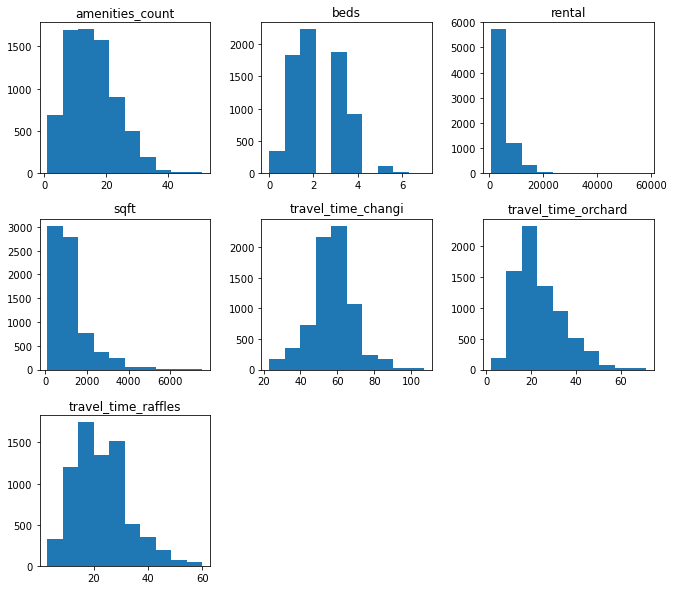

In [74]:
master_df_eda.hist(bins=10, grid = False, figsize=(11,10));

#### Outlier Analysis

In [75]:
numerical_columns = ['beds','rental','sqft','travel_time_changi','travel_time_orchard','travel_time_raffles']

In [76]:
for k,v in master_df_eda[numerical_columns].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(master_df_eda[numerical_columns])[0]
    print("%s has outliers percentage of %.2f%%" % (k, perc))

beds has outliers percentage of 0.18%
rental has outliers percentage of 9.01%
sqft has outliers percentage of 8.46%
travel_time_changi has outliers percentage of 6.52%
travel_time_orchard has outliers percentage of 1.64%
travel_time_raffles has outliers percentage of 2.65%


<a name="section-3a"></a>
### Rental Price

In [77]:
master_df_eda['rental'].describe()

count     7313.000000
mean      5065.159442
std       3696.560734
min        535.000000
25%       3000.000000
50%       3900.000000
75%       5800.000000
max      58000.000000
Name: rental, dtype: float64

In [78]:
descriptive_stats = master_df_eda['rental'].describe()

mean_rental = descriptive_stats[1]
std_rental = descriptive_stats[2]
min_rental = descriptive_stats[3]
median_rental = descriptive_stats[5]
max_rental = descriptive_stats[7]

# Show the calculated statistics
print("Statistics for Singapore condo rental dataset:\n")
print(f"Minimum price: ${min_rental}") 
print(f"Maximum price: ${max_rental}") 
print(f"Median price: ${median_rental}") 
print(f"Mean price: ${round(mean_rental,1)}") 
print(f"Standard deviation of prices: ${round(std_rental,1)}") 

Statistics for Singapore condo rental dataset:

Minimum price: $535.0
Maximum price: $58000.0
Median price: $3900.0
Mean price: $5065.2
Standard deviation of prices: $3696.6


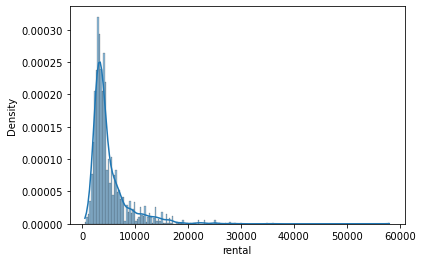

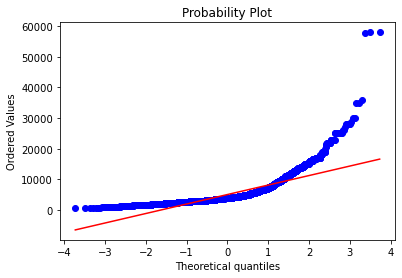

In [79]:
sns.histplot(master_df_eda['rental'], kde=True, bins='auto', stat = 'density');
fig = plt.figure()
res = stats.probplot(master_df_eda['rental'], plot=plt)

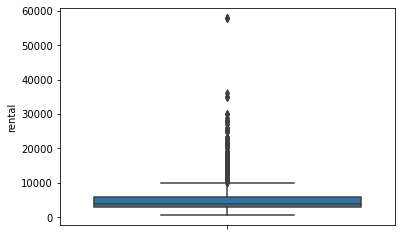

In [80]:
sns.boxplot(y=master_df_eda['rental'])

In [81]:
print("Skewness: %f" % master_df_eda['rental'].skew())

Skewness: 3.497237


We observe a significant right skew of rental price

#### Log transformation to remove skewness and manage outliers in Rental column (dependent variable)

In [82]:
master_df_eda['rental_log'] = master_df_eda['rental'].apply(lambda x: np.log(x))

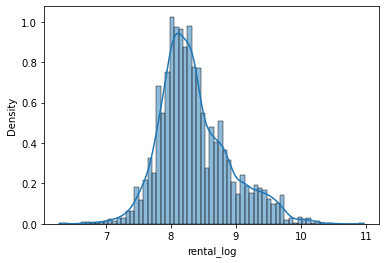

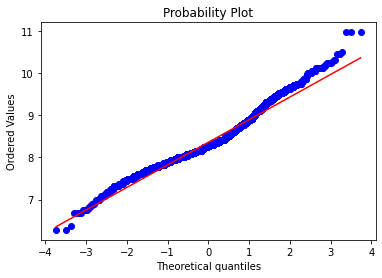

In [83]:
sns.histplot(master_df_eda['rental_log'], kde=True, bins='auto', stat = 'density');
fig = plt.figure()
res = stats.probplot(master_df_eda['rental_log'], plot=plt)

In [84]:
print("Skewness: %f" % master_df_eda['rental_log'].skew())

Skewness: 0.696259


Skewness in Rental prices is resolved by using log transformation

<a name="section-3b"></a>
### Amenities

In [85]:
# Value counts of amenities
amenities_df = pd.DataFrame.from_dict(Counter(list_of_amenities), orient='index').reset_index()
amenities_df.rename(columns={'index':'amenities', 0:'count'}, inplace = True)
amenities_df['percentage'] = round(100 * (amenities_df['count'] / master_df['rental'].describe()[0]),1)
amenities_df.sort_values(['count'], ascending = False).set_index('amenities')

,count,percentage
amenities,,
Gym,5665,77.5
Security,5423,74.2
Parking,5190,71.0
BBQ,4947,67.6
Swimming Pool,4592,62.8
Playground,4169,57.0
Jacuzzi,3666,50.1
Aircon,3580,49.0
Clubhouse,3487,47.7


#### Count of Amenities

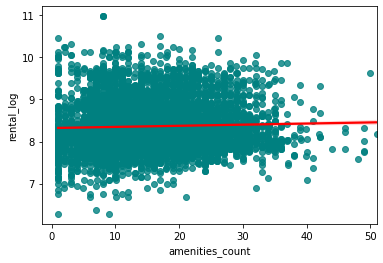

In [86]:
sns.regplot(x = 'amenities_count',y = 'rental_log', data = master_df_eda, x_jitter=.05, scatter_kws={"color": "teal"}, line_kws={"color": "red"})

No clear correlation between number of amenities in the condo project and the rental price. Therefore, we will want to look at the types of amenities present at the condo unit.

#### Analyze amenities types

In [87]:
list_of_amenities = []
for i in master_df_eda['amenities']:
    for j in i.split(', '):
        list_of_amenities.append(j)
list_of_amenities = [x.replace("'","") for x in list_of_amenities]

In [88]:
# Value counts of amenities
amenities_df = pd.DataFrame.from_dict(Counter(list_of_amenities), orient='index').reset_index()
amenities_df.rename(columns={'index':'amenities', 0:'count'}, inplace = True)
amenities_df['percentage'] = round(100 * (amenities_df['count'] / master_df_eda['rental_log'].describe()[0]),1)
amenities_df.sort_values(['count'], ascending = False).set_index('amenities')

,count,percentage
amenities,,
Gym,5661,77.4
Security,5419,74.1
Parking,5187,70.9
BBQ,4944,67.6
Swimming Pool,4590,62.8
Playground,4165,57.0
Jacuzzi,3663,50.1
Aircon,3580,49.0
Clubhouse,3483,47.6


<a name="section-3c"></a>
### Beds

In [89]:
beds_df = pd.DataFrame(master_df_eda['beds'].value_counts().rename_axis('beds').reset_index(name='counts'))
beds_df['percentage'] = round(100 * (beds_df['counts'] / beds_df['counts'].sum()),1)
beds_df

,beds,counts,percentage
0,2,2224,30.4
1,3,1878,25.7
2,1,1830,25.0
3,4,908,12.4
4,0,346,4.7
5,5,114,1.6
6,6,12,0.2
7,7,1,0.0


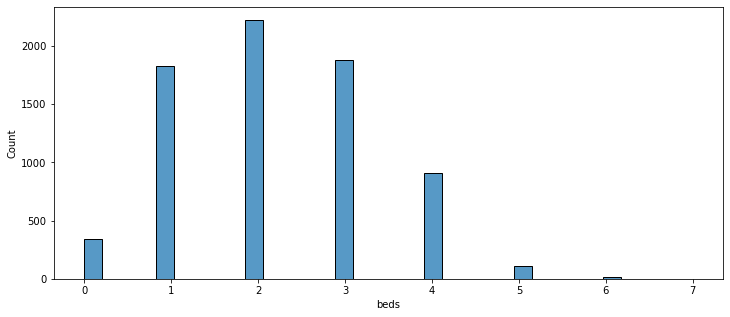

In [90]:
plt.figure(figsize=(12, 5))
sns.histplot(x='beds', data = master_df_eda);

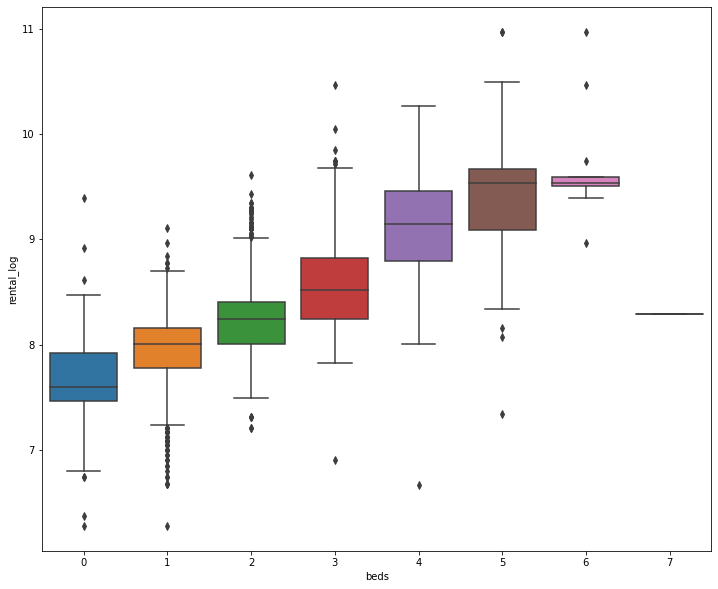

In [91]:
plt.figure(figsize=(12, 10))
sns.boxplot(x="beds", y="rental_log", data=master_df_eda)

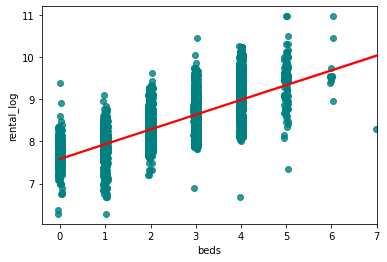

In [92]:
sns.regplot(x = 'beds',y = 'rental_log', data = master_df_eda, x_jitter=.05, scatter_kws={"color": "teal"}, line_kws={"color": "red"})

<a name="section-3d"></a>
### Developer

In [93]:
# Percentage of missing data for developer column
print('Missing data for Developer column = ',round(100 * (master_df_eda['developer'].isna().sum() / len(master_df_eda['developer'])),1),str('%'))

Missing data for Developer column =  14.7 %


In [94]:
# Number of different developers (based on available data)
developer_df = pd.DataFrame(master_df_eda['developer'].value_counts().rename_axis('developer').reset_index(name='counts'))
len(developer_df)

815

In [95]:
developer_df['counts'].sum()

6241

In [96]:
developer_df['percentage'] = round(100 * (developer_df['counts'] / developer_df['counts'].sum()),1)

In [97]:
developer_df.head(50)

,developer,counts,percentage
0,Far East Organization,266,4.3
1,City Developments Ltd,198,3.2
2,"City Developments Ltd,AIG Global Real Estate",169,2.7
3,Frasers Centrepoint Homes,135,2.2
4,FEC Skyline Pte Ltd,119,1.9
5,Bishan Properties Pte Ltd,110,1.8
6,Ms Residential 1 Pte. Ltd. / Ms Residential 2 ...,107,1.7
7,Natwest Development Pte Ltd (Far East Organiza...,100,1.6
8,Lucky Pinnacle Pte Ltd (Far East),85,1.4
9,Far East Success,72,1.2


<a name="section-3e"></a>
### District

In [98]:
district_df = pd.DataFrame(master_df_eda['district'].value_counts().rename_axis('district').reset_index(name='counts'))
district_df['percentage'] = round(100 * (district_df['counts'] / district_df['counts'].sum()),1)
len(district_df)

27

In [99]:
district_df = pd.merge(district_df, district_details, on = 'district')
district_df

,district,counts,percentage,locations
0,D09,1612,22.0,"Orchard Road, River Valley"
1,D10,901,12.3,"Bukit Timah, Holland, Balmoral"
2,D01,556,7.6,"Raffles Place, Marina, Cecil"
3,D11,462,6.3,"Novena, Newton, Thomson"
4,D15,456,6.2,"Joo Chiat, Marina Parade, Katong"
5,D03,414,5.7,"Tiong Bahru, Alexandra, Queenstown"
6,D14,356,4.9,"Geylang, Paya Lebar, Sims"
7,D02,345,4.7,"Tanjong Pagar, Chinatown"
8,D05,291,4.0,"Buona Vista, Pasir Panjang, Clementi"
9,D04,224,3.1,"Mount Faber, Telok Blangah, Harbourfront"


In [100]:
# Look at Mean of Rental Price
district_value_df_mean = master_df_eda[['district','rental']]
district_value_df_mean.columns = ['district','mean_rental']
district_value_df_mean = district_value_df_mean.groupby(['district']).mean()
district_value_df_mean['mean_rental'] = district_value_df_mean['mean_rental'].astype(int)
district_value_df_mean.reset_index()
district_value_df_mean = pd.merge(district_value_df_mean, district_details, on = 'district')
district_value_df_mean.sort_values(['mean_rental'], ascending = False)

,district,mean_rental,locations
9,D10,8411,"Bukit Timah, Holland, Balmoral"
3,D04,8297,"Mount Faber, Telok Blangah, Harbourfront"
8,D09,6202,"Orchard Road, River Valley"
0,D01,4682,"Raffles Place, Marina, Cecil"
1,D02,4501,"Tanjong Pagar, Chinatown"
2,D03,4342,"Tiong Bahru, Alexandra, Queenstown"
6,D07,4329,"Bugis, Beach Road, Golden Mile"
10,D11,4235,"Novena, Newton, Thomson"
4,D05,4191,"Buona Vista, Pasir Panjang, Clementi"
5,D06,4086,"Clarke Quay, City Hall"


In [101]:
# Look at Median values as well, in view of skew in Rental price distribution
district_value_df_median = master_df_eda[['district','rental']]
district_value_df_median.columns = ['district','median_rental']
district_value_df_median = district_value_df_median.groupby(['district']).median()
district_value_df_median['median_rental'] = district_value_df_median['median_rental'].astype(int)
district_value_df_median.reset_index()
district_value_df_median = pd.merge(district_value_df_median, district_details, on = 'district')
district_value_df_median.sort_values(['median_rental'], ascending = False)

,district,median_rental,locations
9,D10,6600,"Bukit Timah, Holland, Balmoral"
3,D04,6500,"Mount Faber, Telok Blangah, Harbourfront"
8,D09,4900,"Orchard Road, River Valley"
0,D01,4200,"Raffles Place, Marina, Cecil"
2,D03,4000,"Tiong Bahru, Alexandra, Queenstown"
19,D20,3800,"Ang Mo Kio, Bishan, Thomson"
6,D07,3800,"Bugis, Beach Road, Golden Mile"
1,D02,3800,"Tanjong Pagar, Chinatown"
4,D05,3700,"Buona Vista, Pasir Panjang, Clementi"
10,D11,3700,"Novena, Newton, Thomson"


##### Let's look at Rental Price per Square Foot (PSF) to account for the different unit sizes of the rental listings

In [102]:
district_value_df_psf_mean = master_df_eda[['district','rental','sqft']]
district_value_df_psf_mean['mean_psf'] = district_value_df_psf_mean['rental'] / district_value_df_psf_mean['sqft']
district_value_df_psf_mean.drop(columns = ['rental','sqft'], inplace = True)
district_value_df_psf_mean = district_value_df_psf_mean.groupby(['district']).mean()
district_value_df_psf_mean = pd.merge(district_value_df_psf_mean, district_details, on = 'district')
district_value_df_psf_mean['mean_psf'] = round(district_value_df_psf_mean['mean_psf'],2)
district_value_df_psf_mean.sort_values(['mean_psf'], ascending = False)

,district,mean_psf,locations
5,D06,6.93,"Clarke Quay, City Hall"
1,D02,5.70,"Tanjong Pagar, Chinatown"
0,D01,5.56,"Raffles Place, Marina, Cecil"
8,D09,5.02,"Orchard Road, River Valley"
6,D07,4.87,"Bugis, Beach Road, Golden Mile"
2,D03,4.67,"Tiong Bahru, Alexandra, Queenstown"
7,D08,4.66,"Little India, Farrer Park"
13,D14,4.51,"Geylang, Paya Lebar, Sims"
3,D04,4.41,"Mount Faber, Telok Blangah, Harbourfront"
10,D11,4.33,"Novena, Newton, Thomson"


In [103]:
# Look at Median values as well, in view of skew in Rental price distribution
district_value_df_psf_median = master_df_eda[['district','rental','sqft']]
district_value_df_psf_median['median_psf'] = district_value_df_psf_median['rental'] / district_value_df_psf_median['sqft']
district_value_df_psf_median.drop(columns = ['rental','sqft'], inplace = True)
district_value_df_psf_median = district_value_df_psf_median.groupby(['district']).median()
district_value_df_psf_median = pd.merge(district_value_df_psf_median, district_details, on = 'district')
district_value_df_psf_median['median_psf'] = round(district_value_df_psf_median['median_psf'],2)
district_value_df_psf_median.sort_values(['median_psf'], ascending = False)

,district,median_psf,locations
5,D06,6.92,"Clarke Quay, City Hall"
1,D02,5.55,"Tanjong Pagar, Chinatown"
0,D01,5.52,"Raffles Place, Marina, Cecil"
8,D09,4.99,"Orchard Road, River Valley"
6,D07,4.77,"Bugis, Beach Road, Golden Mile"
2,D03,4.71,"Tiong Bahru, Alexandra, Queenstown"
7,D08,4.48,"Little India, Farrer Park"
11,D12,4.39,"Toa Payoh, Serangoon, Balestier"
13,D14,4.35,"Geylang, Paya Lebar, Sims"
3,D04,4.31,"Mount Faber, Telok Blangah, Harbourfront"


<a name="section-3f"></a>
### Electoral Division

In [104]:
elec_div_df = pd.DataFrame(master_df_eda['electoral_div'].value_counts().rename_axis('electoral_div').reset_index(name='counts'))
elec_div_df['percentage'] = round(100 * (elec_div_df['counts'] / elec_div_df['counts'].sum()),1)

In [105]:
elec_div_df.head(20)

,electoral_div,counts,percentage
0,Tanjong Pagar,3105,42.5
1,Jalan Besar,1731,23.7
2,Marine Parade,521,7.1
3,West Coast,496,6.8
4,Mountbatten,234,3.2
5,East Coast,222,3.0
6,Holland-Bukit Timah,140,1.9
7,Bishan-Toa Payoh,122,1.7
8,Jurong,104,1.4
9,Aljunied,101,1.4


In [106]:
elec_div_rental = pd.DataFrame(master_df_eda.groupby('electoral_div')['rental'].mean().rename_axis('electoral_div').reset_index(name='mean_rental'))
elec_div_rental['mean_rental'] = elec_div_rental['mean_rental'].apply(lambda x:int(round(x,0)))
elec_div_rental.sort_values(by = 'mean_rental', ascending = False)

,electoral_div,mean_rental
27,Tanjong Pagar,6443
28,West Coast,6037
7,Holland-Bukit Timah,5051
17,Mountbatten,4688
10,Jalan Besar,4139
16,Marymount,3990
4,Bukit Panjang,3793
20,Pioneer,3666
24,Sembawang,3633
15,Marsiling-Yew Tee,3586


<a name="section-3g"></a>
### Lease

In [107]:
master_df_eda['lease'].value_counts()

Flexible     5445
24 months    1376
12 months     473
6 months       13
36 months       6
Name: lease, dtype: int64

In [108]:
# Regroup lease
master_df_eda['lease'].replace('24 months','greater_than_or_equal_24m', inplace = True)
master_df_eda['lease'].replace('36 months','greater_than_or_equal_24m', inplace = True)
master_df_eda['lease'].replace('6 months','less_than_24m', inplace = True)
master_df_eda['lease'].replace('12 months','less_than_24m', inplace = True)

In [109]:
lease_df = pd.DataFrame(master_df_eda['lease'].value_counts().rename_axis('lease').reset_index(name='counts'))
lease_df['counts'].sum()

7313

In [110]:
lease_df

,lease,counts
0,Flexible,5445
1,greater_than_or_equal_24m,1382
2,less_than_24m,486


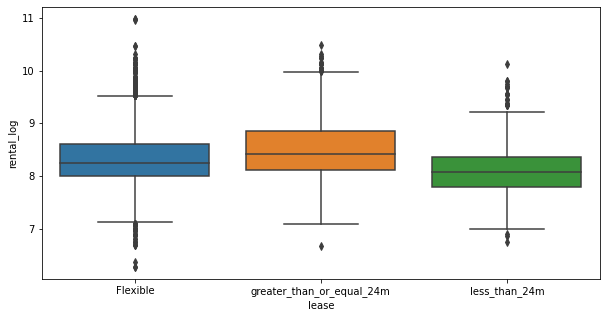

In [111]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="lease", y="rental_log", data=master_df_eda)

In [112]:
lease_flexible = master_df_eda[master_df_eda['lease']=='Flexible']['rental_log']
lease_gt24m = master_df_eda[master_df_eda['lease']=='greater_than_or_equal_24m']['rental_log']
lease_lt24m = master_df_eda[master_df_eda['lease']=='less_than_24m']['rental_log']

In [113]:
# ANOVA test
F, p = stats.f_oneway(lease_flexible, lease_gt24m, lease_lt24m)
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=123.019, p=0.000


In [114]:
m_comp = pairwise_tukeyhsd(endog=master_df_eda['rental'], groups=list(master_df_eda['lease']), alpha=0.05)
print(m_comp)

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
          group1                    group2           meandiff  p-adj   lower      upper    reject
-------------------------------------------------------------------------------------------------
                 Flexible greater_than_or_equal_24m  1106.2525 0.001   847.8668  1364.6381   True
                 Flexible             less_than_24m  -995.6368 0.001 -1401.7558  -589.5178   True
greater_than_or_equal_24m             less_than_24m -2101.8893 0.001 -2554.2894 -1649.4892   True
-------------------------------------------------------------------------------------------------


<a name="section-3h"></a>
### Nearest MRT

In [115]:
# Percentage of missing data for nearest MRT column
print('Missing data for Nearest MRT column = ',round(100 * (len(master_df_eda[master_df_eda['nearest_mrt_dist_min']=='none_nearby']) / len(master_df_eda['nearest_mrt_dist_min'])),1),str('%'))

Missing data for Nearest MRT column =  39.1 %


In [116]:
mrt_min_df = pd.DataFrame(master_df_eda['nearest_mrt_dist_min'].value_counts().rename_axis('nearest_mrt_dist_min').reset_index(name='count'))

In [117]:
mrt_min_df_no_null = master_df_eda[master_df_eda['nearest_mrt_dist_min'] != 'none_nearby']["nearest_mrt_dist_min"]

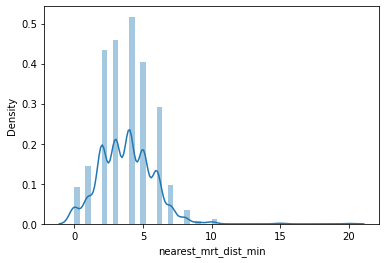

In [118]:
sns.distplot(mrt_min_df_no_null)

___

In [119]:
mrt_metre_df = pd.DataFrame(master_df_eda['nearest_mrt_dist_metres'].value_counts().rename_axis('nearest_mrt_dist_metres').reset_index(name='count'))
mrt_metre_df

,nearest_mrt_dist_metres,count
0,none_nearby,2860
1,16,221
2,2,168
3,46,156
4,84,153
5,29,152
6,1,144
7,60,123
8,21,117
9,68,102


In [120]:
master_df_eda[master_df_eda['nearest_mrt_dist_metres'] == 803]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres,freehold_status,rental_log
0,"'Penthouse', 'Water Feature', 'Maid Room', 'Gy...",3,Hoi Hup Realty Pte Ltd,D09,Tanjong Pagar,greater_than_or_equal_24m,Waterford Residence,Somerset MRT,River Valley,Condo,S$3.93 psf,8500,2164,999 Years,63,21,26,Partially Furnished,17,20,803,Freehold,9.047821


In [121]:
mrt_metre_df_no_null = master_df_eda[master_df_eda['nearest_mrt_dist_metres'] != 'none_nearby']["nearest_mrt_dist_metres"]

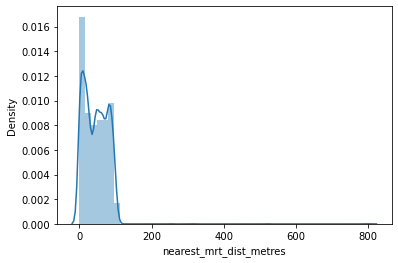

In [122]:
sns.distplot(mrt_metre_df_no_null)

<a name="section-3i"></a>
### Neighbourhood

In [123]:
len(master_df_eda[master_df_eda['neighbourhood'] == 'None'])

1566

In [124]:
# Percentage of None data for Neighbourhood column
print('Missing data for Neighbourhood column = ',round(100 * (len(master_df_eda[master_df_eda['neighbourhood'] == 'None']) / len(master_df_eda['neighbourhood'])),1),str('%'))

Missing data for Neighbourhood column =  21.4 %


To use DISTRICT column for location analysis instead of Neighbourhood column

<a name="section-3j"></a>
### Property Type

In [125]:
prop_type_df = pd.DataFrame(master_df_eda['property_type'].value_counts().rename_axis('property_type').reset_index(name='counts'))
prop_type_df

,property_type,counts
0,Condo,7285
1,Executive Condo,28


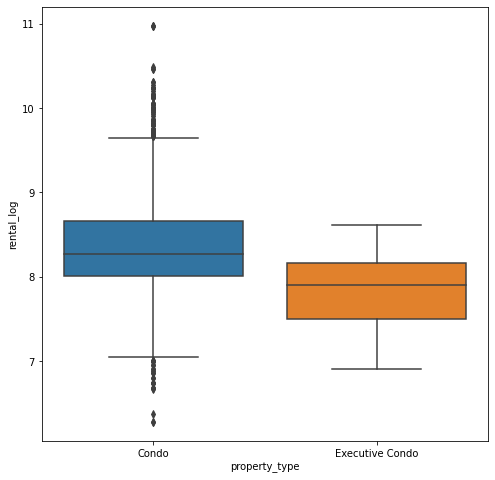

In [126]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="property_type", y="rental_log", data=master_df_eda)

Most are condominiums (99.6%), so no need to create separate group for executive condo

<a name="section-3k"></a>
### Square feet (sqft) - Built-up Area

In [127]:
sqft_df = pd.DataFrame(master_df_eda['sqft'].value_counts().rename_axis('sqft').reset_index(name='counts'))
sqft_df = sqft_df.sort_values('sqft', ascending = False)
sqft_df.head(30)

,sqft,counts
614,7556,1
362,7061,3
358,7000,3
749,6985,1
530,6600,1
800,6300,1
729,6297,1
753,6252,1
390,6050,2
512,6049,1


In [128]:
master_df_eda[master_df_eda['sqft'] == master_df_eda['sqft'].max()]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres,freehold_status,rental_log
0,"'Bomb Shelter', 'Closet', 'Aircon', 'High Ceil...",5,Golden Development Pte Ltd (Far East Organizat...,D10,Tanjong Pagar,greater_than_or_equal_24m,Beverly Hill,NaN,Tanglin,Condo,S$4.76,36000,7556,Freehold,65,20,28,Partially Furnished,17,none_nearby,none_nearby,Freehold,10.491274


In [129]:
master_df_eda[master_df_eda['sqft'] == master_df_eda['sqft'].min()]

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres,freehold_status,rental_log
0,',0,NaN,D03,Tanjong Pagar,Flexible,MDIS Residences @ Stirling,NaN,Queenstown,Condo,S$5.35,535,100,-,73,26,26,Unknown,1,none_nearby,none_nearby,-,6.282267
0,"'Aircon', 'Bed', 'Low Floor', 'Mid Floor', 'Hi...",0,NaN,D03,Tanjong Pagar,Flexible,MDIS Residences @ Stirling,NaN,Queenstown,Condo,S$5.88,588,100,-,73,26,26,Unknown,7,none_nearby,none_nearby,-,6.376727
0,"'Dishwasher', 'Aircon', 'Fridge', 'Bed', 'Drye...",1,NaN,D03,Tanjong Pagar,Flexible,Tiong Bahru Estate,NaN,Bukit Merah,Condo,S$8.00,800,100,99 Years,66,22,19,Unknown,6,none_nearby,none_nearby,Non-Freehold,6.684612
0,"'Gym', 'Swimming Pool', 'Jacuzzi', 'Playground...",1,Novelty Singapore Pte Ltd,D14,Marine Parade,Flexible,Atrium Residences,Aljunied MRT,Geylang,Condo,S$10.50,1050,100,Freehold,47,28,20,Unknown,7,6,58,Freehold,6.956545
0,"'Clubhouse', 'Sauna', 'Swimming Pool', 'Wading...",1,Dairy Farm Estate Pte Ltd,D23,Holland-Bukit Timah,Flexible,Dairy Farm Estate,Hillview MRT,Bukit Panjang,Condo,S$8.00,800,100,Freehold,73,33,38,Unknown,10,5,90,Freehold,6.684612
0,"'Clubhouse', 'Tennis Court', 'Gym', 'Sauna', '...",1,St Windermere Park Pte Ltd (Singapore Technolo...,D23,Marsiling-Yew Tee,Flexible,Windermere,Yew Tee MRT,Choa Chu Kang,Condo,S$8.00,800,100,99 Years,73,41,46,Unknown,12,5,2,Non-Freehold,6.684612
0,"'Fitness Corner', 'Aircon', 'Washer', 'Stove',...",1,NaN,D03,Tanjong Pagar,Flexible,MDIS Residences @ Stirling,NaN,Queenstown,Condo,S$5.35,535,100,-,73,26,26,Fully Furnished,9,none_nearby,none_nearby,-,6.282267
0,"'Gym', 'Swimming Pool', 'Playground', 'Fitness...",0,Winprime Investment Pte Ltd (Wing Tai Asia),D12,Bishan-Toa Payoh,Flexible,Oleander Towers,Toa Payoh MRT,Toa Payoh,Condo,S$8.50,850,100,99 Years,60,17,22,Unknown,8,5,88,Non-Freehold,6.745236
0,',1,NaN,D01,Jalan Besar,Flexible,People's Park Complex,Chinatown MRT,None,Condo,S$8.50,850,100,99 Years,53,19,16,Unknown,1,1,4,Non-Freehold,6.745236
0,"'Clubhouse', 'City View', 'Renovated', 'Aircon...",1,Capitaland Ltd,D08,Jalan Besar,less_than_24m,Citylights,Lavender MRT,Kallang,Condo,S$11.00,1100,100,99 Years,47,20,12,Fully Furnished,18,2,95,Non-Freehold,7.003065


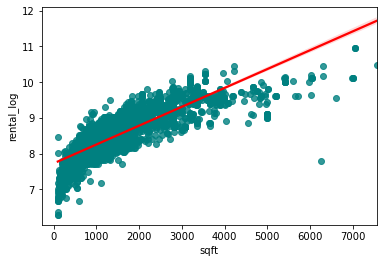

In [130]:
sns.regplot(x = 'sqft',y = 'rental_log', data = master_df_eda, x_jitter=.05, scatter_kws={"color": "teal"}, line_kws={"color": "red"})

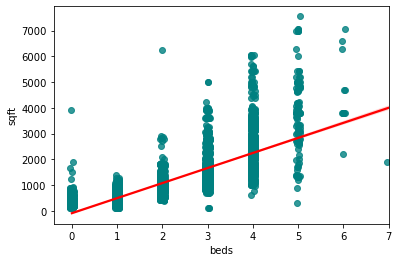

In [131]:
sns.regplot(x = 'beds',y = 'sqft', data = master_df_eda, x_jitter=.05, scatter_kws={"color": "teal"}, line_kws={"color": "red"})

Obvious correlation between number of bedrooms and sqft of unit

<a name="section-3l"></a>
### Tenure

In [132]:
tenure_df = pd.DataFrame(master_df_eda['freehold_status'].value_counts().rename_axis('freehold_status').reset_index(name='count'))
tenure_df['percentage'] = round(100 * (tenure_df['count'] / tenure_df['count'].sum()),1)
tenure_df

,freehold_status,count,percentage
0,Freehold,3880,53.1
1,Non-Freehold,3372,46.1
2,-,61,0.8


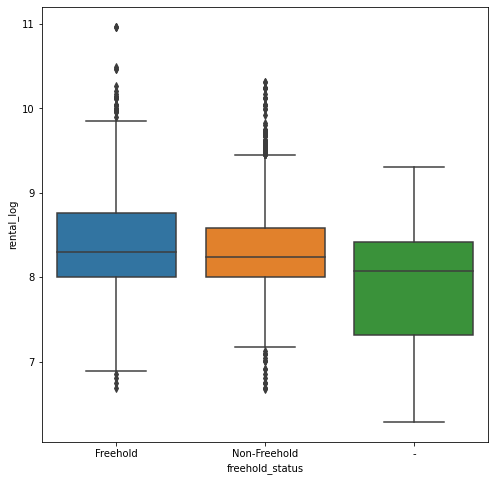

In [133]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="freehold_status", y="rental_log", data=master_df_eda)

In [134]:
freehold = master_df_eda[master_df_eda['freehold_status'] == 'Freehold']['rental_log']
non_freehold = master_df_eda[master_df_eda['freehold_status'] == 'Non-Freehold']['rental_log']
                                
t, p = stats.ttest_ind(freehold, non_freehold)
print("t = " + str(t))
print("p = " + str(p))

t = 5.208477239659511
p = 1.9563776770699656e-07


<a name="section-3m"></a>
### Travel Time (Public Transport) to Changi Airport

In [135]:
travel_changi_df = master_df_eda['travel_time_changi']

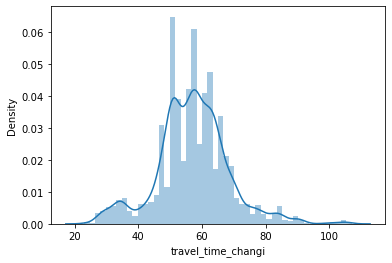

In [136]:
#sns.displot(travel_changi_df, kind = "kde")
sns.distplot(travel_changi_df)

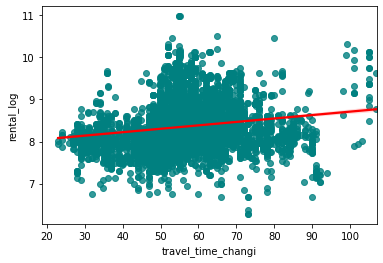

In [137]:
sns.regplot(x = 'travel_time_changi',y = 'rental_log', data = master_df_eda, x_jitter=.1, scatter_kws={"color": "teal"}, line_kws={"color": "red"})

<a name="section-3n"></a>
### Travel Time (Public Transport) to Orchard Road

In [138]:
travel_orchard_df = master_df_eda['travel_time_orchard']

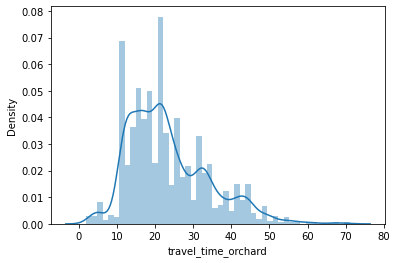

In [139]:
#sns.displot(travel_orchard_df, kind = "kde")
sns.distplot(travel_orchard_df)

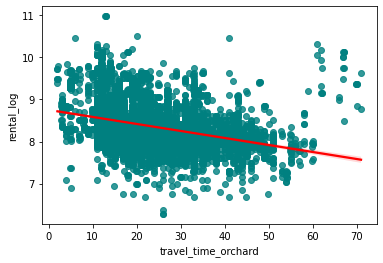

In [140]:
sns.regplot(x = 'travel_time_orchard',y = 'rental_log', data = master_df_eda, x_jitter=.1, scatter_kws={"color": "teal"}, line_kws={"color": "red"})

<a name="section-3o"></a>
### Travel Time (Public Transport) to Raffles Place

In [141]:
travel_raffles_df = master_df_eda['travel_time_raffles']

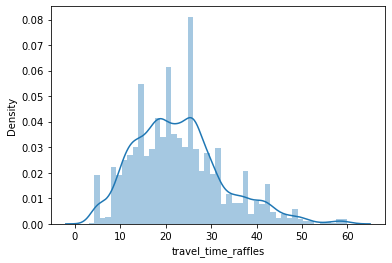

In [142]:
#sns.displot(travel_raffles_df, kind = "kde")
sns.distplot(travel_raffles_df)

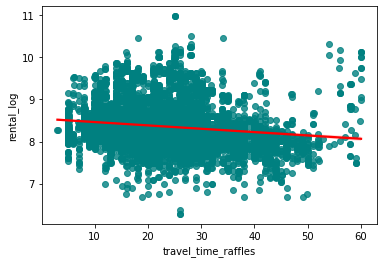

In [143]:
sns.regplot(x = 'travel_time_raffles',y = 'rental_log', data = master_df_eda, x_jitter=.1, scatter_kws={"color": "teal"}, line_kws={"color": "red"})

<a name="section-3p"></a>
### Furnishing

In [144]:
# Percentage of missing data for furnishing column
print('Missing data for Furnishing column = ',round(100 * (len(master_df_eda[master_df_eda.furnishing == 'Unknown']) / len(master_df_eda['furnishing'])),1),str('%'))

Missing data for Furnishing column =  45.7 %


In [145]:
furnishing_df = pd.DataFrame(master_df_eda['furnishing'].value_counts().rename_axis('furnishing').reset_index(name='count'))
furnishing_df

,furnishing,count
0,Unknown,3340
1,Partially Furnished,2018
2,Fully Furnished,1897
3,Unfurnished,58


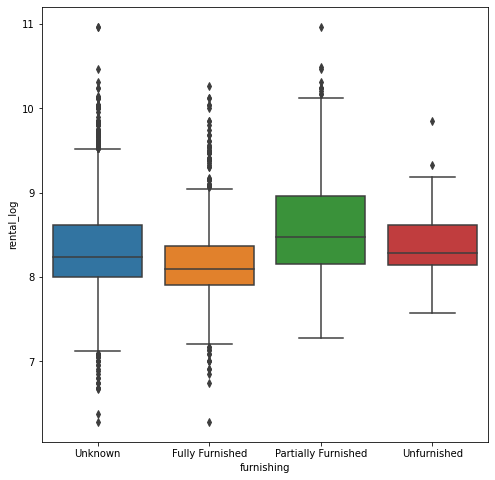

In [146]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="furnishing", y="rental_log", data=master_df_eda)

In [147]:
full_furnishing = master_df_eda[master_df_eda['furnishing'] == 'Fully Furnished']['rental_log']
partial_furnishing = master_df_eda[master_df_eda['furnishing'] == 'Partially Furnished']['rental_log']
                                
t, p = stats.ttest_ind(partial_furnishing, full_furnishing)
print("t = " + str(t))
print("p = " + str(p))

t = 27.892288027309004
p = 2.591898830018718e-156


Partially furnished units are significantly more costly as compared to fully furnished units

In [148]:
# Perform multiple pairwise comparison (Tukey HSD)
df_furnishing_no_null = master_df_eda[master_df_eda['furnishing'] != 'Unknown']
m_comp = pairwise_tukeyhsd(endog=df_furnishing_no_null['rental_log'], groups=list(df_furnishing_no_null['furnishing']), alpha=0.05)
print(m_comp)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
    Fully Furnished Partially Furnished   0.4411  0.001  0.4041 0.4781   True
    Fully Furnished         Unfurnished   0.2509  0.001  0.0966 0.4053   True
Partially Furnished         Unfurnished  -0.1902 0.0108 -0.3444 -0.036   True
-----------------------------------------------------------------------------


<a name="section-3q"></a>
### Condo Project Name

In [149]:
condo_name_df = pd.DataFrame(master_df_eda['name'].value_counts().rename_axis('condo_name').reset_index(name='count'))
condo_name_df['percentage'] = round(100 * (condo_name_df['count'] / tenure_df['count'].sum()),1)
condo_name_df.head(30)

,condo_name,count,percentage
0,The Sail @ Marina Bay,169,2.3
1,Artra,119,1.6
2,Marina One Residences,107,1.5
3,The Clift,100,1.4
4,Icon,85,1.2
5,Altez,85,1.2
6,Reflections At Keppel Bay,81,1.1
7,The Scotts Tower,72,1.0
8,Orchard Scotts,71,1.0
9,Pastoral View,60,0.8


In [150]:
# Look at Mean
condo_name_value_df = master_df_eda[['name','district','rental']]
condo_name_value_df.columns = ['name','district','mean_rental']
condo_name_value_df = condo_name_value_df.groupby(['name','district']).mean()
condo_name_value_df['mean_rental'] = condo_name_value_df['mean_rental'].astype(int)
condo_name_value_df.sort_values(['mean_rental'], ascending = False).reset_index()

,name,district,mean_rental
0,The Nassim,D10,49847
1,Le Nouvel Ardmore,D10,28800
2,Seven Palms Sentosa Cove,D04,26500
3,Hana,D10,25909
4,Ardmore Residence,D10,21715
5,Beverly Hill,D10,21400
6,Ferrell Residences,D10,21000
7,The Club Residences,D04,19666
8,The Oceanfront @ Sentosa Cove,D04,18983
9,The Oliv,D10,18258


In [151]:
# Look at Median
condo_name_value_df_median = master_df_eda[['name','district','rental']]
condo_name_value_df_median.columns = ['name','district','median_rental']
condo_name_value_df_median = condo_name_value_df_median.groupby(['name','district']).median()
condo_name_value_df_median['median_rental'] = condo_name_value_df_median['median_rental'].astype(int)
condo_name_value_df_median = condo_name_value_df_median.reset_index().sort_values(['median_rental'], ascending = False)
condo_name_value_df_median

,name,district,median_rental
999,The Nassim,D10,57944
462,Le Nouvel Ardmore,D10,28800
349,Hana,D10,28000
763,Seven Palms Sentosa Cove,D04,26500
73,Ardmore Residence,D10,22000
1003,The Oceanfront @ Sentosa Cove,D04,22000
298,Ferrell Residences,D10,21000
1118,Twentyone Angullia Park,D09,17194
819,St Thomas Suites,D09,17000
791,Skypark,D09,17000


##### Look at Rental Price per sqft (PSF) to account for different unit sizes

In [159]:
condo_name_value_df_mean = master_df_eda[['name','rental','sqft']]
condo_name_value_df_mean['mean_psf'] = condo_name_value_df_mean['rental'] / condo_name_value_df_mean['sqft']
condo_name_value_df_mean.drop(columns = ['rental','sqft'], inplace = True)
condo_name_value_df_mean = condo_name_value_df_mean.groupby(['name']).mean()
condo_name_value_df_mean['mean_psf'] = round(condo_name_value_df_mean['mean_psf'],2)
condo_name_value_df_mean.reset_index()
condo_name_value_df_mean.sort_values(['mean_psf'], ascending = False)


,mean_psf
name,
Eng Aun Mansion,16.43
The Box,11.43
Willyn Ville,11.00
Top Ten,11.00
East Mews,10.42
Paterson Collection,10.12
lyf Funan Singapore,9.80
Wallich Residence,9.74
Textile Centre,9.33


In [160]:
# Look at median
condo_name_value_df_median = master_df_eda[['name','rental','sqft']]
condo_name_value_df_median['median_psf'] = condo_name_value_df_median['rental'] / condo_name_value_df_median['sqft']
condo_name_value_df_median.drop(columns = ['rental','sqft'], inplace = True)
condo_name_value_df_median = condo_name_value_df_median.groupby(['name']).median()
condo_name_value_df_median['median_psf'] = round(condo_name_value_df_median['median_psf'],2)
condo_name_value_df_median.reset_index()
condo_name_value_df_median.sort_values(['median_psf'], ascending = False)

,median_psf
name,
Eng Aun Mansion,16.43
The Box,11.43
Willyn Ville,11.00
Top Ten,11.00
East Mews,10.42
Paterson Collection,10.12
Wallich Residence,9.67
Textile Centre,9.33
Sol Acres,9.26


<a name="section-3r"></a>
### Correlation Matrix

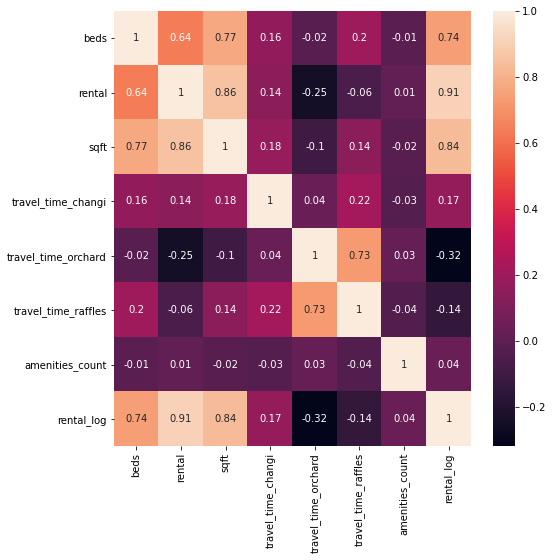

In [153]:
plt.figure(figsize=(8, 8))
corr_matrix = master_df_eda.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

As expected, there is clear correlation with the number of bedrooms ('beds') with the size of the unit (sqft)

<a name="section-3s"></a>
### Regression Plots

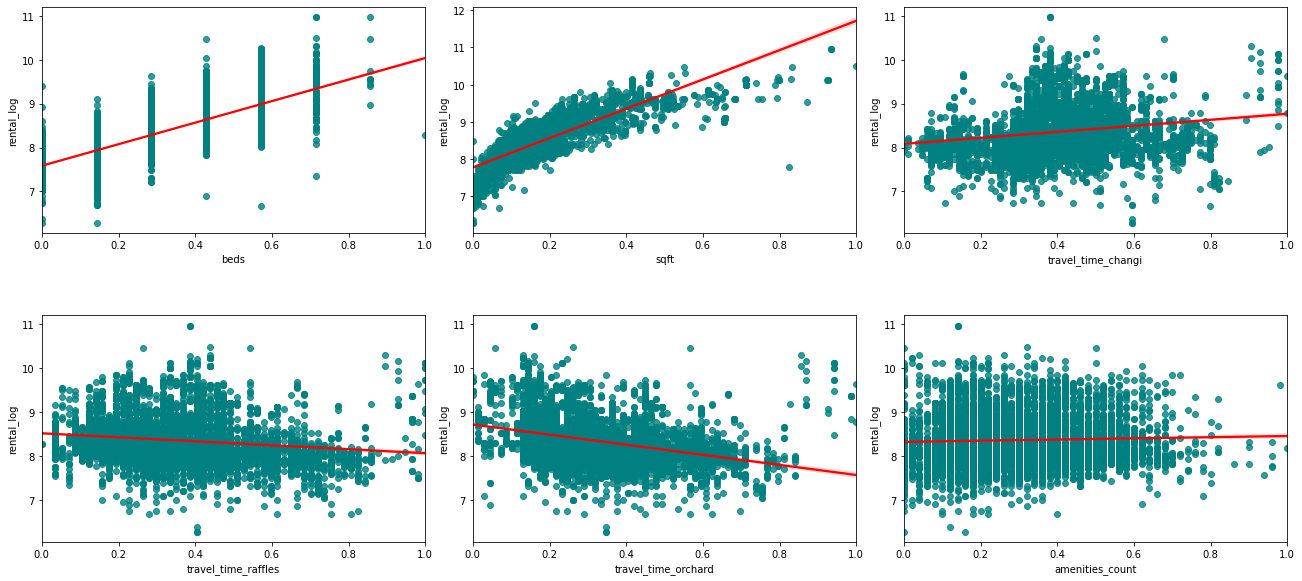

In [154]:
min_max_scaler = preprocessing.MinMaxScaler()
numerical_columns = ['beds', 'sqft', 'travel_time_changi', 'travel_time_raffles', 'travel_time_orchard', 'amenities_count']
x = master_df_eda.loc[:,numerical_columns]
y = master_df_eda['rental_log']
reg_plot_df = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=numerical_columns)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18, 8))

axs = axs.flatten()
for i, k in enumerate(numerical_columns):
    sns.regplot(y=y, x=reg_plot_df[k], ax=axs[i], scatter_kws={"color": "teal"}, line_kws={"color": "red"})
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Export Dataset for Prediction

In [155]:
master_df_eda.head()

,amenities,beds,developer,district,electoral_div,lease,name,nearest_mrt_name,neighbourhood,property_type,psf,rental,sqft,tenure,travel_time_changi,travel_time_orchard,travel_time_raffles,furnishing,amenities_count,nearest_mrt_dist_min,nearest_mrt_dist_metres,freehold_status,rental_log
0,"'Clubhouse', 'Gym', 'Spa Pool', 'Swimming Pool...",3,Grange Properties Pte Ltd (Chip Eng Seng Corpo...,D09,Tanjong Pagar,Flexible,Grange Infinite,Somerset MRT,River Valley,Condo,S$4.52,9500,2100,Freehold,53,12,16,Unknown,12,5,19,Freehold,9.159047
0,"'Aircon', 'Gym', 'Swimming Pool', 'Wading Pool...",3,Devonshire Development Pte Ltd,D09,Tanjong Pagar,Flexible,The Suites @ Central,Somerset MRT,River Valley,Condo,S$5.00,7000,1399,Freehold,56,12,13,Unknown,12,3,62,Freehold,8.853665
0,"'Bathtub', 'Aircon', 'Maid Room', 'Gym', 'Park...",3,Ue One-North Developments Pte Ltd,D05,West Coast,greater_than_or_equal_24m,The Rochester Residences,Buona Vista MRT,Queenstown,Condo,S$3.18,6200,1948,99 Years,70,27,22,Fully Furnished,19,3,75,Non-Freehold,8.732305
0,"'Jogging Track', 'Multi-purpose Hall', 'Hammoc...",2,MCL Land (Prestige),D22,Jurong,Flexible,Lakeville,NaN,Jurong West,Condo,S$3.61,2800,775,99 Years,85,46,39,Unknown,17,none_nearby,none_nearby,Non-Freehold,7.937375
0,"'Security', 'Jacuzzi', 'Lap Pool', 'Tennis Cou...",1,Bayshore Green Pte Ltd,D15,Marine Parade,Flexible,The Seawind,NaN,Bedok,Condo,S$3.78,2400,635,Freehold,46,41,34,Unknown,4,none_nearby,none_nearby,Freehold,7.783224


In [156]:
#master_df_eda.to_csv('./Data/condo_dataset_preprocessed.csv',index=False)